### A. Data Preparation

1.1. Loading the Data

In [ ]:
%load_ext rpy2.ipython

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%R 
train = read.csv('/content/drive/MyDrive/432Project/sign_mnist_train.csv')
test = read.csv('/content/drive/MyDrive/432Project/sign_mnist_test.csv')

In [ ]:
%%R
print(c(sum(is.na(train)),sum(is.na(test))))

[1] 0 0


In [ ]:
%%R
sum(is.na(train))

[1] 0


In [ ]:
%%R
sum(is.na(test))

[1] 0


In [ ]:
%%R
length(test[1,])

[1] 785


In [ ]:
%%R
negative_val_cols_train <- list()
negative_val_cols_test <- list()
for(i in 2:785){
    if(min(train[,i])<0){
        negative_val_cols_train = append(negative_val_cols_train,i)
    }
    if(min(test[,i])<0){
        negative_val_cols_test = append(negative_val_cols_test,i)
    }
}
print(c(length(negative_val_cols_train),length(negative_val_cols_train)))

[1] 0 0


In [ ]:
%%R
constant_val_cols_train <- list()
constant_val_cols_test <- list()
for(i in 2:785){
    if(min(train[,i])==max(train[,i])){
        constant_val_cols_train = append(constant_val_cols_train,i)
    }
    if(min(test[,i])==max(test[,i])){
        constant_val_cols_test = append(constant_val_cols_test,i)
    }
}
print(c(length(constant_val_cols_train),length(constant_val_cols_test)))

[1] 0 0


In [ ]:
%%R
install.packages("png")

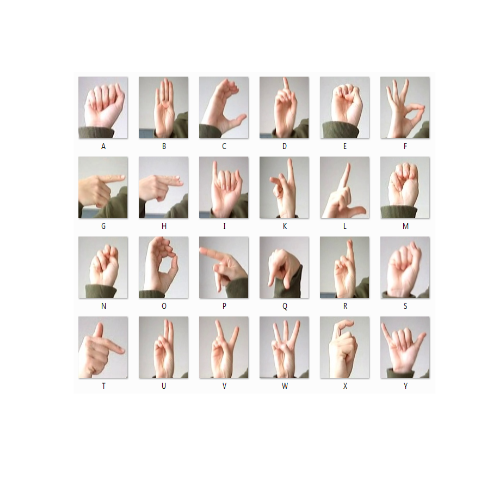

In [ ]:
%%R
library(png)
img <- readPNG("/content/drive/MyDrive/432Project/amer_sign2.png")
plot.new() 
rasterImage(img,0,0,1,1)

In [ ]:
# Closely resembling labels: A(0),E (4),M (12),N (13),S(18)
# G (6),H (7),T(19)
# U (20),R(17)

1.2 Exploring the Data

In [ ]:
%%R
print(paste(c("Train Dimensions",dim(train))))
print(paste(c("Test Dimensions",dim(test))))

[1] "Train Dimensions" "27455"            "785"             
[1] "Test Dimensions" "7172"            "785"            


In [ ]:
# Check if any missing obs
%%R
sum(is.na(train))
sum(is.na(test))

[1] 0


In [ ]:
%%R
# Remapping of labels from discontinuous numbers 0-24(9 missing) to A-Z(without J and Z)
train$label = as.factor(train$label)
test$label = as.factor(test$label)

In [ ]:
%%R
# Remapping of labels from discontinuous numbers 0-24(9 missing) to A-Z(without J and Z)
train$label = as.factor(train$label)
test$label = as.factor(test$label)

levels(train$label) <- list(
    A = "0", B = "1", C = "2", D = "3", E = "4", F = "5", G = "6", H = "7", I = "8", K = "10", L = "11",
    M = "12",N = "13", O = "14",P = "15",Q = "16",R = "17",S = "18",T = "19", U = "20",V = "21", W = "22",X = "23", Y = "24")
levels(test$label) <- list(
    A = "0", B = "1", C = "2", D = "3", E = "4", F = "5", G = "6", H = "7", I = "8", K = "10", L = "11",
    M = "12",N = "13", O = "14",P = "15",Q = "16",R = "17",S = "18",T = "19", U = "20",V = "21", W = "22",X = "23", Y = "24") 

In [ ]:
%%R

train[1,1]

[1] D
Levels: A B C D E F G H I K L M N O P Q R S T U V W X Y


In [ ]:
%%R
#training data
X_train = train[,-1]
Y_train = train[,1]
#testing data
X_test = test[,-1]
Y_test = test[,1]

In [ ]:
%%R
# head(train,5)

NULL


In [ ]:
%%R
#Analyse the pixels intensity values
subset_pixels = train[, -1]
summary(subset_pixels)
#Some pixels have always an intensity of 0 (max=0) or 255 (min=255)
#Remove pixels with constant intensity

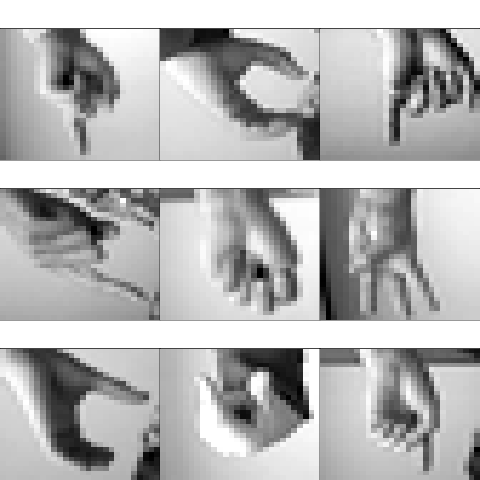

In [ ]:
%%R
# visualize the data --- first 9

par(mfcol=c(3,3))
par(mar=c(0, 0, 3, 0), xaxs='i', yaxs='i')

for (i in 1:9){
    my_mat=matrix((train[i,2:ncol(train)]), nrow=28, ncol=28)
    #my_mat = apply(my_mat, 2, rev)
    my_mat_numbers = apply(my_mat, 2, as.numeric)
    image(1:28, 1:28, my_mat_numbers, col=gray((0:255)/255),
          xaxt = 'n', yaxt = 'n')
          #main = paste(train[i,1])) 
}

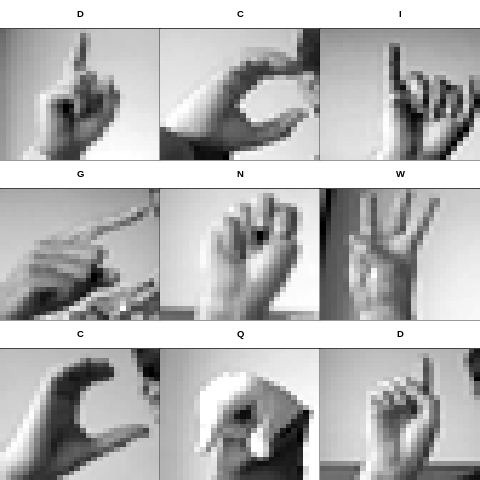

In [ ]:
%%R

#This code will inverse the above image 

par(mfcol=c(3,3))
par(mar=c(0, 0, 3, 0), xaxs='i', yaxs='i')

for (i in 1:9){
    my_mat=matrix((train[i,2:ncol(train)]), nrow=28, ncol=28)
    #my_mat = apply(my_mat, 2, rev)
    my_mat_numbers = apply(my_mat, 2, as.numeric)
    
    my_mat_new = matrix("NA",nrow = 28,ncol = 28)
    for (j in 1:28){
      my_mat_new[,j] = my_mat_numbers[,29-j]
    }
    
    my_mat_new = apply(my_mat_new, 2, as.numeric)
    
    image(1:28, 1:28, my_mat_new, col=gray((0:255)/255),
          xaxt = 'n', yaxt = 'n',
          main = paste(train[i,1]))
}


In [ ]:

%%R
table(train$label)
table(test$label)


  A   B   C   D   E   F   G   H   I   K   L   M   N   O   P   Q   R   S   T   U 
331 432 310 245 498 247 348 436 288 331 209 394 291 246 347 164 144 246 248 266 
  V   W   X   Y 
346 206 267 332 


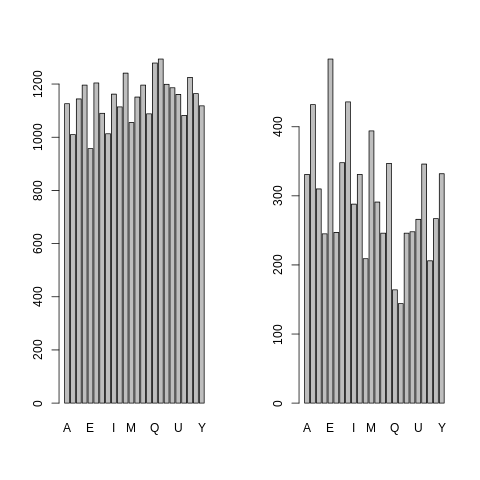

In [ ]:
%%R

par(mfrow=c(1,2))
plot(train$label)
plot(test$label)

# **B. Dimensionality Reduction**

## **1. PCA**

In [ ]:
%%R
train.pca <- prcomp(train[,-1], center = TRUE,scale. = TRUE)
pca_summary = summary(train.pca)

#pca_summary
pca_summary$importance[,1:100]
names(train.pca)


[1] "sdev"     "rotation" "center"   "scale"    "x"       


In [ ]:
%%R
#####################DO NOT RUN  THIS############################

# the rotation matrix:
rotation_matrix = train.pca$rotation

# the diagonal of the covariance matrix of the PCA results
# is the same as the eigenvalues of the original data
eigenvalues = eigen(cor(X_train))$values
diag_cov = diag(var(train.pca$x[,]))

# double check that the new principal components are orthogonal
cor(train.pca$x)

# We can also look at the correlation between the original predictor variables
# and the new principal components
cor(cbind(X_train,data.frame(train.pca$x)))


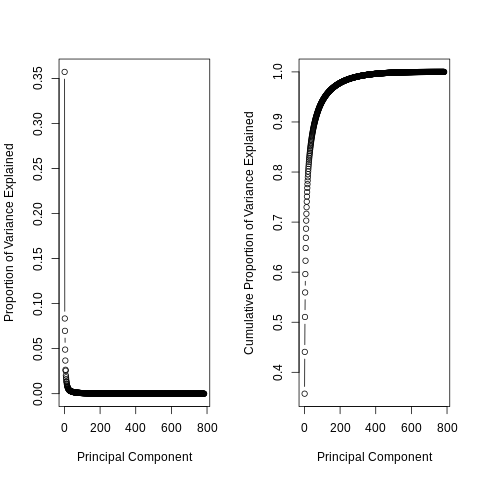

In [ ]:
%%R


#To compute the principal component score vector, we don’t need to multiply the loading with data. 
#The matrix x has the principal component score vectors
dim(train.pca$x)

#plot the resultant principal components.
#biplot(train.pca, scale = 0) #The parameter scale = 0 ensures that arrows are scaled to represent the loadings.


var_explained = train.pca$sdev^2 / sum(train.pca$sdev^2)


#create scree plot
library(ggplot2)

par(mfrow=c(1,2))

qplot(c(1:785), var_explained) + 
  geom_line() + 
  xlab("Principal Component") + 
  ylab("Variance Explained") +
  ggtitle("Scree Plot") +
  ylim(0, 1)

plot(var_explained, xlab = "Principal Component",
             ylab = "Proportion of Variance Explained",
             type = "b")

# Cumulative plot
qplot(c(1:785), cumsum(var_explained)) + 
  geom_line() + 
  xlab("Principal Component") + 
  ylab(NULL) + 
  ggtitle("Cumulative Scree Plot") +
  ylim(0,1)

plot(cumsum(var_explained), xlab = "Principal Component",
              ylab = "Cumulative Proportion of Variance Explained",
              type = "b")


The first 100 PCs explain more than 94% of the total variation.

## **2. PCA+ t-SNE**

t-SNE: Used to visualise higher dimension data in 1,2, or 3 dimensions

Only for visualisation, not for dimensionality reduction
The visualised clusters help to know the number of labels/clusters in the sample before training

In [ ]:
%%R
pct_var_explained<-train.pca$sdev^2/sum(train.pca$sdev^2)
cumsum(pct_var_explained)

train_reduced <- data.frame(
    label = train$label, 
    predict(train.pca)[, cumsum(pct_var_explained) < 0.95]
)

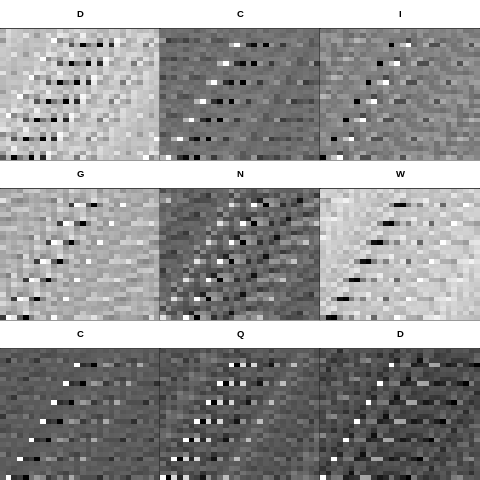

In [ ]:
%%R 
par(mfcol=c(3,3))
par(mar=c(0, 0, 3, 0), xaxs='i', yaxs='i')

for (i in 1:9){
    my_mat=matrix((train_reduced[i,2:ncol(train_reduced)]), nrow=28, ncol=28)
    my_mat_numbers = apply(my_mat, 2, as.numeric)
    image(1:28, 1:28, my_mat_numbers, col=gray((0:255)/255),
          xaxt = 'n', yaxt = 'n',
          main = paste(train_reduced[i,1])) 
}

In [ ]:
%%R
# head(train_reduced)

In [ ]:
%%R
install.packages("Rtsne")

Performing PCA
Read the 27455 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 27455
 - point 20000 of 27455
Done in 47.20 seconds (sparsity = 0.004577)!
Learning embedding...
Iteration 50: error is 110.556997 (50 iterations in 6.85 seconds)
Fitting performed in 6.85 seconds.


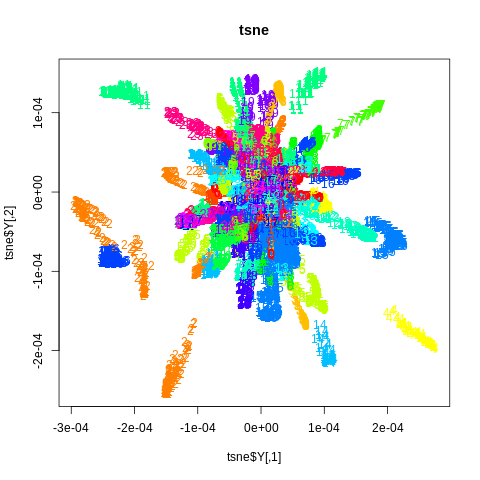

In [ ]:
%%R
library(Rtsne)
## Executing the algorithm on curated data
tsne <- Rtsne(train_reduced[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 50)

## Plotting
colors = rainbow(length(unique(train_reduced$label)))
names(colors) = unique(train_reduced$label)

plot(tsne$Y, t='n', main="tsne")
text(tsne$Y, labels=train_reduced$label, col=colors[train_reduced$label])

We do not see any clear boundaries or separation between different classes.

We now try to scale the train data before applying PCA. Since each column represents a pixel value between 0-255, we scale the columns by dividing them by 255.

In [ ]:
%%R
######We should change this variable names########### 

# Scaling the training and testing dataset 
X_train_scaled = X_train/ 255
X_test_scaled = X_test/ 255

Performing PCA
Read the 27455 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 27455
 - point 20000 of 27455
Done in 65.41 seconds (sparsity = 0.004577)!
Learning embedding...
Iteration 50: error is 110.556998 (50 iterations in 8.63 seconds)
Fitting performed in 8.63 seconds.


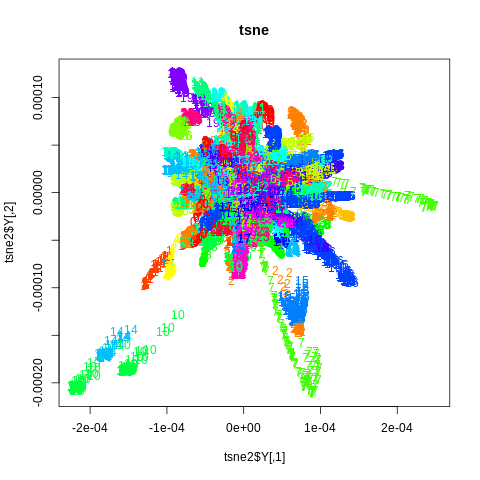

In [ ]:
%%R
train_scaled.pca <- prcomp(X_train, center = TRUE,scale. = TRUE)
pct_var_explained2<-train_scaled.pca$sdev^2/sum(train_scaled.pca$sdev^2)

train_scaled_reduced <- data.frame(
    label = train$label, 
    predict(train_scaled.pca)[, cumsum(pct_var_explained2) < 0.95]
)

library(Rtsne)
tsne2<- Rtsne(train_scaled_reduced[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 50)

## Plotting
colors = rainbow(length(unique(train_scaled_reduced$label)))
names(colors) = unique(train_scaled_reduced$label)

plot(tsne2$Y, t='n', main="tsne")
text(tsne2$Y, labels=train_scaled_reduced$label, col=colors[train_scaled_reduced$label])

PCA applied on scaled data followed by t-SNE, gives a good separation between classes.

## **3. LDA**

In [ ]:
%%R
#check
X_train[1:2,]

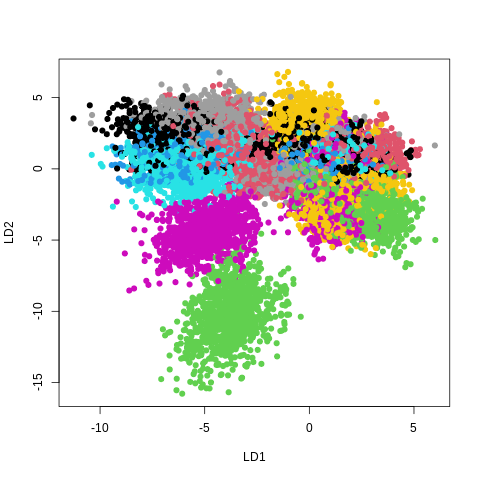

In [ ]:
%%R

library(MASS)

sign.lda = lda(X_train,Y_train)
projected_data_train = as.matrix(X_train) %*% sign.lda$scaling
plot( projected_data_train, col = Y_train, pch = 19 )

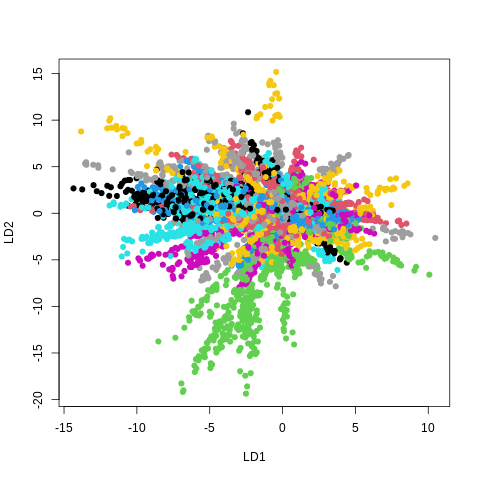

In [ ]:
%%R

# Plotting LDA Model using testing
projected_data_test = as.matrix(X_test) %*% sign.lda$scaling
plot( projected_data_test, col = Y_test, pch = 19 )

## **4. LDA + t-SNE**

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/Rtsne_0.15.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 67595 bytes (66 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to 

Performing PCA
Read the 27455 x 23 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 27455
 - point 20000 of 27455
Done in 22.00 seconds (sparsity = 0.004894)!
Learning embedding...
Iteration 50: error is 110.551167 (50 iterations in 8.36 seconds)
Fitting performed in 8.36 seconds.


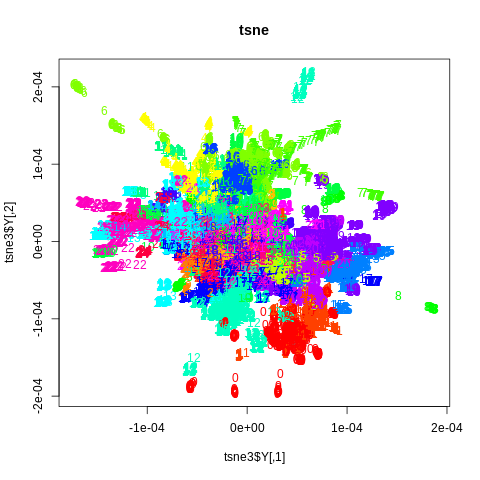

In [ ]:
%%R
install.packages('Rtsne')
library(Rtsne)

train_lds=as.data.frame(projected_data_train)

train_lda_reduced <- data.frame(label = train$label, train_lds)

library(Rtsne)
tsne3<- Rtsne(train_lda_reduced[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 50)

## Plotting
colors = rainbow(length(unique(train_lda_reduced$label)))
names(colors) = unique(train_lda_reduced$label)

plot(tsne3$Y, t='n', main="tsne")
text(tsne3$Y, labels=train_lda_reduced$label, col=colors[train_lda_reduced$label])

The separation between classes in the plot obtained after after applying t-SNE on LDA-reduced columns is good. 

# Final data after Dimension Reduction

## **1. PCA**


First column is label and next column are the 100 PC's in both test and train data

In [ ]:
%%R

new_train = data.frame(Y_train , train.pca$x)
names(new_train)[names(new_train) == 'Y_train'] = 'label'

#we are interested in first 100 PCs
train_pca = new_train[,1:101]


#transform test into PCA # Predicting PC in test dataset
new_test = predict(train.pca, newdata = test[,-1])
new_test = data.frame(Y_test,new_test)
names(new_test)[names(new_test) == 'Y_test'] = 'label'
test_pca = new_test[,1:101]

In [ ]:
%%R

dim(train_pca)


[1] 27455   101


In [ ]:
%%R

dim(test_pca)

[1] 7172  101


## **2. LDA**

First column is class and next column are the 23 LD's in both test and train data

In [ ]:
%%R

#check trace (this gives %separation achived)
#sign.lda

#Data preparation
train_lda = data.frame(Y_train,projected_data_train)
names(train_lda)[names(train_lda) == 'Y_train'] = 'label'

test_lda = data.frame(Y_test,projected_data_test)
names(test_lda)[names(test_lda) == 'Y_test'] = 'label'

In [ ]:
%%R

dim(train_lda)

[1] 27455    24


In [ ]:
%%R

dim(test_lda)

[1] 7172   24


## **2. Fast KNN**

###Feature engineering using fastknn


fastknn generates k * c new features, where c is the number of class labels. The new features are computed from the distances between the observations and their k nearest neighbors inside each class, as follows:

1. First test feature contains the distances between each test instance and its nearest neighbor inside the first class.
2. Second test feature contains the sums of distances between each test instance and its 2 nearest neighbors inside the first class.
3. Third test feature contains the sums of distances between each test instance and its 3 nearest neighbors inside the first class.
4. And so on.


Repeat it for each class to generate the k * c new features. For the new training set, a n-fold CV approach is used to avoid overfitting.


In [ ]:
%%R
library("devtools")
install_github("davpinto/fastknn")
#install.packages("C50")
library(C50)    
library(fastknn)

R[write to console]: Loading required package: usethis

R[write to console]: Downloading GitHub repo davpinto/fastknn@HEAD



These packages have more recent versions available.
It is recommended to update all of them.
Which would you like to update?

1: All                          
2: CRAN packages only           
3: None                         
4: withr (2.4.2 -> 2.4.3) [CRAN]
5: glue  (1.5.0 -> 1.5.1) [CRAN]



In [ ]:
%%R

install.packages("caret")
library(dplyr)
library(caret)

In [ ]:
%%R

fknn_model = knnExtract(data.matrix(train_pca[, -1]), as.factor(train_pca[, 1]), data.matrix(test_pca[, -1]), k = 8)

dim(fknn_model$new.tr)
dim(fknn_model$new.te)

newtr = preProcess(fknn_model$new.tr, method = c("pca"))
newtr_predicted = predict(newtr, fknn_model$new.tr)
newtr_predicted = as.data.frame(newtr_predicted)
newtr_predicted = cbind(label = train_pca$label, newtr_predicted)

newte = preProcess(fknn_model$new.te, method = c("pca"))
newte_predicted = predict(newtr, fknn_model$new.te)
newte_predicted = as.data.frame(newte_predicted)
newte_predicted = cbind(label = test_pca$label, newte_predicted)


R[write to console]: Building new training set...



  |======================================================================| 100%


R[write to console]: Building new test set...



  |======================================================================| 100%


In [ ]:
%%R

train_fknn = newtr_predicted
test_fknn = newte_predicted


In [ ]:
%%R

dim(train_fknn)

[1] 27455    19


In [ ]:
%%R

dim(test_fknn)

[1] 7172   19


# C.Model Building

## **1. Logistic Regression for Multi-class Classification Problem**

Problems:

1) Gives error when applied to 114 variables obtained from PCA (after scaling). It is able to work for a maximum of 40 variables only

Error:"Too many weights"

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5543767/

Restricting the number of variables entered into a multivariate logistic regression model?** It has been suggested that the data should contain at least ten events for each variable entered into a logistic regression model.



In [ ]:
%%R
install.packages("nnet")

In [ ]:
%%R
dim(train_pca)

[1] 27455   101


In [ ]:
%%R
train_pca$label=as.factor(train_pca$label)

In [ ]:
%%R
## Fitting Logistic Regression on reduced data obtained from PCA
library(nnet)
cols=names(train_pca)
m = length(cols)
formula7=paste("label ~", cols[2])
for(j in 3:40) formula7=paste(formula7, " + ", cols[j], sep="")
formula7

[1] "label ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + PC11 + PC12 + PC13 + PC14 + PC15 + PC16 + PC17 + PC18 + PC19 + PC20 + PC21 + PC22 + PC23 + PC24 + PC25 + PC26 + PC27 + PC28 + PC29 + PC30 + PC31 + PC32 + PC33 + PC34 + PC35 + PC36 + PC37 + PC38 + PC39"


In [ ]:
%%R
model3 = multinom(formula7, data = train_pca,nnet.MaxNWts = 30000)

# weights:  984 (920 variable)
initial  value 87253.467912 
iter  10 value 46836.859450
iter  20 value 30897.200299
iter  30 value 27841.562206
iter  40 value 26180.347486
iter  50 value 24913.519136
iter  60 value 24046.264256
iter  70 value 23303.136003
iter  80 value 22995.088390
iter  90 value 22729.242502
iter 100 value 22524.502572
final  value 22524.502572 
stopped after 100 iterations


In [ ]:
%%R
# Test data with top 39 PCs
test_pca_39= test_pca[,1:40]

In [ ]:
%%R
logreg_pred=predict(model3, test_pca_39)
logreg_cm=table(logreg_pred, test_pca$label)
logreg_cm

           
logreg_pred   A   B   C   D   E   F   G   H   I   K   L   M   N   O   P   Q   R
          A 290   0   0   0   0   0   0   0   0   0   0   0  62   0   0   0   0
          B   0 328   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
          C   0   0 285   0   0  16   0   0   0   0   0   0  21  21   0   0   0
          D   0  17   0 159   0  30  13   0   0   0   0   0   7   0   0   0   0
          E   0   0   0   0 426   0   0   0   0   0   0  28   0   0   0   0   0
          F   0   0  21   0   0 160   0   0   0   2   0   0   0  29   0   8   0
          G   0   0   0   1   0   0 158   7   0   0   0   0  12  21   0   0   1
          H   0   0   2   0   0   5  47 349  10   0   0   3   0   0  24   9   0
          I   0   0   0   0   0   0   3   1 213   0   0   0   0  13  30   0   0
          K   0   0   0   0   0  18   0   0   0  78   0   0   0   0   0   0   1
          L   0   0   0   4   0   5   0   0  21   0 171   0   0   0   0   0  20
          M   0   0   0   0 

In [ ]:
%%R
logreg_accuracy=sum(diag(logreg_cm))/nrow(test_pca)
logreg_accuracy

[1] 0.6027607


## **2. KNN for multi-class Classification Problem**



### **KNN on original data**


In [ ]:
%%R

is.factor(train$label)

[1] TRUE


In [ ]:
%%R

is.factor(test$label)

[1] TRUE


In [ ]:
%%R
install.packages("caret")
library(caret)

In [ ]:
%%R

(train$label)

In [ ]:
%%R

install.packages("class")
library(class)

In [ ]:
%%R

knn.fit1 = knn(train = train[,-1], test = test[,-1], cl = train$label, k = 8)
summary(knn.fit1)

accuracy = function(actual, predicted) 
{
  mean(actual == predicted)
}

knn_accuracy1 = round(accuracy(test$label, knn.fit1),4)
print(paste("The accuracy for original data through KNN with k = 8 is:",knn_accuracy1))


[1] "The accuracy for original data through KNN with k = 8 is: 0.7978"


In [ ]:
%%R

#tuning with caret


knn_tune1 = train(
  y ~ .,
  data = data.frame("x" = train[,-1], "y" = train$label),
  method = "knn",
  trControl = trainControl(method = "cv", number = 5),
  tuneGrid = data.frame(k = seq(1, 20, by = 2))
)

knn_tune1$results



In [ ]:
%%R
#Plot Accuracy vs k
plot(knn_tune1$results$k, 1-knn_tune1$results$Accuracy,
       xlab = "K", ylab = "Classification Error", type = "b",
       pch = 19, col = "darkorange")


R[write to console]: Error in plot(knn_tune1$results$k, 1 - knn_tune1$results$Accuracy, xlab = "K",  : 
  object 'knn_tune1' not found




Error in plot(knn_tune1$results$k, 1 - knn_tune1$results$Accuracy, xlab = "K",  : 
  object 'knn_tune1' not found


RInterpreterError: ignored

In [ ]:
%%R
#Fit Knn with optimal k
knn.fit_opt1 = knn(train = train[,-1], test = test[,-1], cl = train$label, k = 1)
knn_accuracy_opt1 = round(accuracy(test$label, knn.fit_opt1),4)
print(paste("The accuracy for original data through KNN with optimal k is:", knn_accuracy_opt1))


### **KNN on reduced pca data**


**Create training and testing set with selected PCs**

In [ ]:
%%R

dim(train_pca)

[1] 27455   101


In [ ]:
%%R

dim(test_pca)

[1] 7172  101


In [ ]:
%%R

length(train_pca$label)

[1] 27455


In [ ]:
%%R
#fit the model with k =8
knn.fit2 = knn(train = train_pca[,-1], test = test_pca[,-1], cl = as.factor(train_pca$label), k = 8)
summary(knn.fit2)

predicted = knn.fit2
actual = test_pca$label

knn_accuracy2 = round(accuracy(test_pca$label, knn.fit2),4)
print(paste("The accuracy on reduced-pca data through KNN with k = 8 is:",knn_accuracy2))



[1] "The accuracy through KNN with k = 8 is: 0.8833"


In [ ]:
%%R

#tuning 
accuracy = function(actual, predicted) 
{
  mean(actual == predicted)
}


k_near = vector("numeric", 10)                          # declaration to initiate for loop
Accuracy=vector("numeric", 10)                    # declaration to initiate for loop
for (i in 1:10)
  { 
    knn_pca =  knn(train = train_pca[,-1], test = test_pca[,-1], cl = as.factor(train_pca$label), k = i)
    Accuracy[i] = 100 * (mean(test_pca$label == knn_pca))
    k_near[i]=i  
    cat(k_near[i],'=',Accuracy[i],'\n')       # to print % accuracy 
}


    k  Accuracy     Kappa   AccuracySD      KappaSD
1   1 0.9985431 0.9984795 0.0003403056 0.0003551835
2   2 0.9964309 0.9962749 0.0012574061 0.0013123804
3   3 0.9957752 0.9955906 0.0012559225 0.0013108428
4   4 0.9938449 0.9935758 0.0017978128 0.0018764194
5   5 0.9927520 0.9924352 0.0019748707 0.0020612173
6   6 0.9896925 0.9892420 0.0017939201 0.0018724171
7   7 0.9886729 0.9881778 0.0021446428 0.0022385013
8   8 0.9861596 0.9855548 0.0022849209 0.0023848965
9   9 0.9848483 0.9841861 0.0017055059 0.0017801173
10 10 0.9812060 0.9803847 0.0022460335 0.0023441740
11 11 0.9790206 0.9781038 0.0020651872 0.0021554594
12 12 0.9763616 0.9753287 0.0023758855 0.0024796317
13 13 0.9739579 0.9728201 0.0020388570 0.0021280828
14 14 0.9721366 0.9709192 0.0020586703 0.0021485625
15 15 0.9696235 0.9682963 0.0016753435 0.0017487022


In [ ]:
%%R

#plot the graph
opt_k = k_near[which.max(Accuracy)]

plot(k_near,(100-Accuracy),
       xlab = "k", ylab = "Classification Error", type = "b",
       pch = 19, col = "darkorange")



In [ ]:
%%R


#Fit with optimal k and predict on testing data
knn.fit_new = knn(train = train_pca[,-1], test = test_pca[,-1], cl = as.factor(train_pca$label), k = opt_k)
knn_accuracy_new = round(accuracy(Y_test, knn.fit_new),4)
print(paste("The accuracy through KNN on reduced-pca data with optimal k is:",knn_accuracy_new))


### **KNN on reduced-lda data**

In [ ]:
%%R

dim(train_lda)

[1] 27455    24


In [ ]:
%%R

dim(test_lda)

[1] 7172   24


In [ ]:
%%R

knn.fit3 = knn(train = train_lda[,-1], test = test_lda[,-1], cl = as.factor(train_lda$label), k = 8)
summary(knn.fit3)

predicted = knn.fit3
actual = test_lda$label

accuracy = function(actual, predicted) 
{
  mean(actual == predicted)
}

knn_accuracy3 = round(accuracy(test_lda$label, knn.fit3),4)
print(paste("The accuracy on reduced-lda data through KNN with k = 8 is:",knn_accuracy3))


[1] "The accuracy on reduced-lda data through KNN with k = 8 is: 0.4433"


In [ ]:
%%R

#tuning with caret

knn_tune3 = train(
  y ~ .,
  data = data.frame("x" = train_lda[,-1], "y" = as.factor(train_lda$label)),
  method = "knn",
  trControl = trainControl(method = "cv", number = 5),
  tuneGrid = data.frame(k = seq(1, 20, by = 2))
)

knn_tune3$results

    k  Accuracy     Kappa   AccuracySD      KappaSD
1   1 0.9999636 0.9999620 8.144484e-05 8.500474e-05
2   3 0.9998543 0.9998479 1.523951e-04 1.590566e-04
3   5 0.9998543 0.9998479 1.523951e-04 1.590566e-04
4   7 0.9997086 0.9996959 2.443346e-04 2.550154e-04
5   9 0.9996722 0.9996579 2.991950e-04 3.122744e-04
6  11 0.9996358 0.9996199 3.641330e-04 3.800512e-04
7  13 0.9996358 0.9996199 3.641330e-04 3.800512e-04
8  15 0.9995629 0.9995438 3.307283e-04 3.451864e-04
9  17 0.9995629 0.9995438 3.307283e-04 3.451864e-04
10 19 0.9996358 0.9996199 3.641330e-04 3.800512e-04


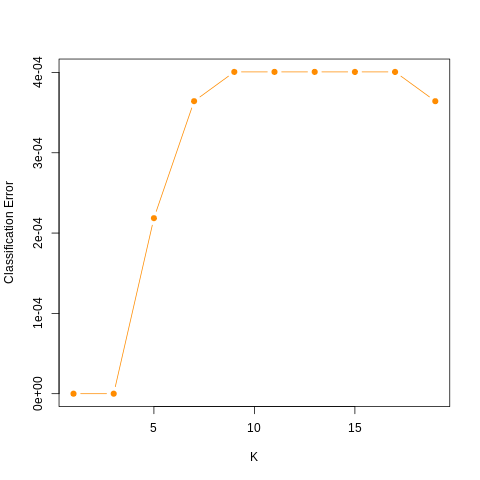

In [ ]:
%%R
#Plot Accuracy vs k

plot(knn_tune3$results$k, 1-knn_tune3$results$Accuracy,
       xlab = "K", ylab = "Classification Error", type = "b",
       pch = 19, col = "darkorange")


In [ ]:
%%R
#Fit knn with optimal k

knn.fit_opt3 = knn(train = train_lda[-1], test = test_lda[-1], cl = as.factor(train_lda$label), k = 1)
knn_accuracy_opt3 = round(accuracy(test_lda$label, knn.fit_opt3),4)
print(paste("The accuracy on reduced-lda data through KNN with k = 1 is:",knn_accuracy_opt3))


[1] "The accuracy on reduced-lda data through KNN with k = 1 is: 0.4644"


In [ ]:
%%R
knn.fit_opt3


   [1] U F K A R W G O R H H L W E L E W A H H C S K N G H X Q H U H I S G R V I
  [38] D Q P M U L Q O F V E G A D W D Y H Q W E G M R A L W C K K E A E U T E E
  [75] R U H L C C V O P V X K A T S O C B H T M K A A T W K E C B Q B P O C T N
 [112] K A T C T F T S D E N N O N L G V S I V V C F X R E W U D P S H U D G B H
 [149] K Y E T D T O S C K H F O T I S S X N D T L E M S A B K Q Q W B A Q R X C
 [186] H N L B A X D A Q I Q N U P F H G M K R A B D V O Y T F N M R D Q E R E I
 [223] F G U B C P H R S G F P F B R R W Y B X L M G K P E R W Q B Y S Y B W G S
 [260] U K A D N G K L K Q T K V U E H E W R A S T G N T G F N S F R U B W B K X
 [297] D S Q S Q S C M B M E S W A E A V K W H C W G Y Q S C F K V K P I S H D R
 [334] H R M T Y N T V E W S R B I P T E W Y C N M W Q K E T Y D I U D D V R H R
 [371] C H U X L D T P B W M H K S N A X K F K E D K O T R T D H A V S H E K M E
 [408] B L O R R R N U X B R V H P B Y N V D A H T H W M B O O K N S B Y K T W I
 [445] G N F W B N S Y O M W

In [ ]:
%%R
install.packages("forcats")
install.packages("dplyr")
library(dplyr, warn.conflicts = FALSE)
library(forcats)

In [ ]:
%%R

##Combined data


# Remapping of labels from discontinuous numbers 0-24 (9 missing) to A-Z (without J and Z)
train$label = as.factor(train$label)
test$label = as.factor(test$label)

levels(train$label) = list(
    A = "0", B = "1", C = "2", D = "3", E = "4", F = "5", G = "6", H = "7", I = "8", K = "10", L = "11",
    M = "12",N = "13", O = "14",P = "15",Q = "16",R = "17",S = "18",T = "19", U = "20",V = "21", W = "22",X = "23", Y = "24")

levels(test$label) = list(
    A = "0", B = "1", C = "2", D = "3", E = "4", F = "5", G = "6", H = "7", I = "8", K = "10", L = "11",
    M = "12",N = "13", O = "14",P = "15",Q = "16",R = "17",S = "18",T = "19", U = "20",V = "21", W = "22",X = "23", Y = "24") 


train_combined_labels=train[,2:785]
glimpse(train$label)

train_combined_labels$label <- fct_collapse(train$label, AEMNS = c("A","E","M","N","S"))
train_combined_labels$label <- fct_collapse(train_combined_labels$label, GHT = c("G","H","T"))
train_combined_labels$label <- fct_collapse(train_combined_labels$label, DRU = c( "D","U","R"))
glimpse(train_combined_labels$label)

train_combined = cbind(train_combined_labels$label, train_combined_labels[,1:784])
names(train_combined)[names(train_combined) == 'train_combined_labels$label'] = 'label'



 Factor w/ 24 levels "A","B","C","D",..: 4 7 3 3 13 16 9 22 4 4 ...
 Factor w/ 16 levels "AEMNS","B","C",..: 4 6 3 3 1 12 7 14 4 4 ...


In [ ]:
%%R

test_combined_labels=test[,2:785]
glimpse(test$label)
test_combined_labels$label <- fct_collapse(test$label, AEMNS = c("A","E","M","N","S"))
test_combined_labels$label <- fct_collapse(test_combined_labels$label, GHT = c("G","H","T"))
test_combined_labels$label <- fct_collapse(test_combined_labels$label, DRU = c( "D","U","R"))
glimpse(test_combined_labels$label)

test_combined = cbind(test_combined_labels$label, test_combined_labels[,1:784])
names(test_combined)[names(test_combined) == 'test_combined_labels$label'] = 'label'

levels(train_combined_labels$label)
levels(test_combined_labels$label)

 Factor w/ 24 levels "A","B","C","D",..: 7 6 10 1 4 21 10 14 4 8 ...
 Factor w/ 16 levels "AEMNS","B","C",..: 6 5 8 1 4 13 8 10 4 6 ...
 [1] "AEMNS" "B"     "C"     "DRU"   "F"     "GHT"   "I"     "K"     "L"    
[10] "O"     "P"     "Q"     "V"     "W"     "X"     "Y"    


### **KNN on combined data - Level 1**

In [ ]:
%%R

k_near = vector("numeric", 10)                          # declaration to initiate for loop
Accuracy=vector("numeric", 10)                    # declaration to initiate for loop
for (i in 1:10)
  { 
    knn.mod =  knn(train = train_combined[,-1], test = test_combined[,-1], cl = as.factor(train_combined$label), k = i)
    Accuracy[i] = 100 * (mean(test_combined$label == knn.mod))
    k_near[i]=i  
    cat(k_near[i],'=',Accuracy[i],'\n')       # to print % accuracy 
}

opt_k = k_near[which.max(Accuracy)]

opt_full_k = k_near[which.max(Accuracy)]
opt_full_k

plot(k_near,(100-Accuracy),
       xlab = "k", ylab = "Classification Error", type = "b",
       pch = 19, col = "darkorange")


knn_full_opt = knn(train = train_combined[,-1], test = test_combined[,-1], 
                   cl = as.factor(train_combined$label), k = opt_k)
knn_full_accuracy_opt = round(accuracy(test_combined$label, knn_full_opt),4)
print(paste("The accuracy through KNN with optimal k is:",knn_full_accuracy_opt))




### **KNN on combined data - Level 2**

### **KNN on combined pca data - Level 1**

In [ ]:
%%R

#PCA DATA FOR TRAINING 

train_pca_combined_labels=train_pca[,2:101]
glimpse(train_pca$label)
train_pca_combined_labels$label <- fct_collapse(train_pca$label, AEMNS = c("A","E","M","N","S"))
train_pca_combined_labels$label <- fct_collapse(train_pca_combined_labels$label, GHT = c("G","H","T"))
train_pca_combined_labels$label <- fct_collapse(train_pca_combined_labels$label, RUD = c("U","R","D"))
glimpse(train_pca_combined_labels$label)


 Factor w/ 24 levels "0","1","2","3",..: 4 7 3 3 13 16 9 22 4 4 ...
 Factor w/ 24 levels "0","1","2","3",..: 4 7 3 3 13 16 9 22 4 4 ...


In [ ]:
%%R
#PCA DATA FOR TESTING

test_pca_combined_labels=test_pca[,2:101]
glimpse(test_pca$label)
test_pca_combined_labels$label <- fct_collapse(test_pca$label, AEMNS = c("A","E","M","N","S"))
test_pca_combined_labels$label <- fct_collapse(test_pca_combined_labels$label, GHT = c("G","H","T"))
test_pca_combined_labels$label <- fct_collapse(test_pca_combined_labels$label, RUD = c("U","R","D"))
glimpse(test_pca_combined_labels$label)



 Factor w/ 24 levels "0","1","2","3",..: 7 6 10 1 4 21 10 14 4 8 ...
 Factor w/ 24 levels "0","1","2","3",..: 7 6 10 1 4 21 10 14 4 8 ...


### **KNN on combined pca data - Level 2**

## **3. Decision Trees**



### **Decision Trees - original data**

In [ ]:
%%R

install.packages("rpart")
library(rpart)



In [ ]:
%%R

#By default, the rpart function uses a 10-fold cross-validation. This can be controlled using the rpart.control() function and specify the xval argument. 

#set 5 fold cross validation
folds = rpart.control(xval = 5)

#fit model
rpart.fit1 = rpart(as.factor(train$label) ~ ., method = "class", data = train, control = folds)
printcp(rpart.fit1)

#rpart.fit1$cptable
#summary(rpart.fit1)
#rpart.fit1$variable.importance

From cffi callback <function _processevents at 0x7f03b5222a70>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/rpy2/rinterface_lib/callbacks.py", line 274, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt



Classification tree:
rpart(formula = as.factor(train$label) ~ ., data = train, method = "class", 
    control = folds)

Variables actually used in tree construction:
 [1] pixel102 pixel217 pixel239 pixel246 pixel413 pixel520 pixel580 pixel613
 [9] pixel621 pixel633

Root node error: 26161/27455 = 0.95287

n= 27455 

        CP nsplit rel error  xerror      xstd
1 0.033447      0   1.00000 1.00057 0.0013348
2 0.026968      1   0.96655 0.96720 0.0017023
3 0.016972      3   0.91262 0.91522 0.0021154
4 0.016819      4   0.89565 0.89289 0.0022565
5 0.016590      5   0.87883 0.89007 0.0022732
6 0.014086      6   0.86224 0.86725 0.0023991
7 0.013532      8   0.83407 0.84550 0.0025063
8 0.010665      9   0.82053 0.82963 0.0025774
9 0.010000     10   0.80987 0.81056 0.0026558


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/rpart.plot_3.1.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 672013 bytes (656 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[w

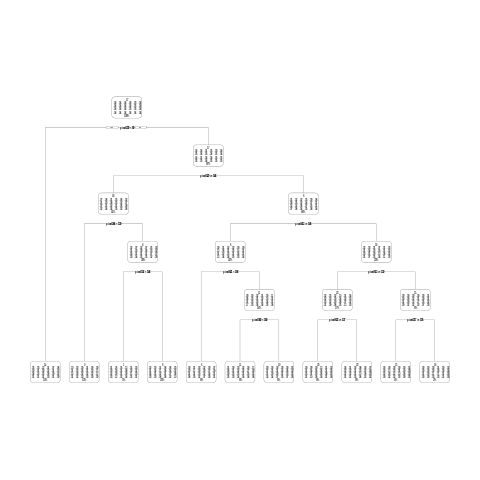

In [ ]:
%%R 

#Tuning a Tree Model

#Tree tuning is essentially about when to stop splitting.

install.packages("rpart.plot")
library(rpart.plot)

#use the 1sd rule
cptarg1 = sqrt(rpart.fit1$cptable[9,1]*rpart.fit1$cptable[8,1])
cptarg1

#obtain the tree corresponding to above `cp` value
prunedtree1 = prune(rpart.fit1,cp=cptarg1) #prunedtree

#plot the tree corresponding to above `cp` value
rpart.plot(prunedtree1)


In [ ]:
%%R

#prediction on testing data

rpart.prediction1 = predict(prunedtree1, newdata = test, type = "class")
#rpart.prediction
tree_table1 = table(`Actual Class` = as.factor(test$label), `Predicted Class` = rpart.prediction1)
tree_table1

tree_accuracy1 = round(accuracy(test$label, rpart.prediction1),4)
print(paste("The accuracy through Decision trees is:",tree_accuracy1))


[1] "The accuracy through Decision trees is: 0.1656"


### **Decision Trees - reduced-pca data**

In [ ]:
%%R

#fit model
rpart.fit2 = rpart(as.factor(train_pca$label) ~ ., method = "class", data = train_pca, control = folds)
printcp(rpart.fit2)

#rpart.fit2$cptable
#summary(rpart.fit2)
#rpart.fit2$variable.importance


Classification tree:
rpart(formula = as.factor(train_pca$label) ~ ., data = train_pca, 
    method = "class", control = folds)

Variables actually used in tree construction:
[1] PC13 PC15 PC2  PC3  PC4  PC5  PC6  PC9 

Root node error: 26161/27455 = 0.95287

n= 27455 

         CP nsplit rel error  xerror      xstd
1  0.037804      0   1.00000 1.00313 0.0013010
2  0.022591      1   0.96220 0.96533 0.0017199
3  0.022221      2   0.93960 0.92921 0.0020174
4  0.021865      5   0.87294 0.88617 0.0022958
5  0.020680      6   0.85108 0.86300 0.0024210
6  0.014564      7   0.83040 0.83315 0.0025621
7  0.013264      9   0.80127 0.80372 0.0026822
8  0.010665     10   0.78801 0.78892 0.0027362
9  0.010282     11   0.77734 0.78155 0.0027616
10 0.010000     12   0.76706 0.77745 0.0027753


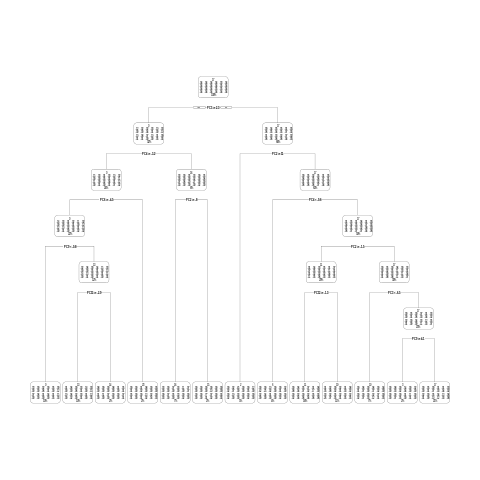

In [ ]:
%%R

#Tuning a Tree Model

#use the 1sd rule
cptarg2 = sqrt(rpart.fit2$cptable[10,1]*rpart.fit2$cptable[9,1])
cptarg2

#obtain the tree corresponding to above `cp` value
prunedtree2 = prune(rpart.fit2,cp=cptarg2) #prunedtree

#plot the tree corresponding to above `cp` value
rpart.plot(prunedtree2)



In [ ]:
%%R

#prediction on testing data

rpart.prediction2 = predict(prunedtree2, newdata = test_pca, type = "class")
#rpart.prediction
tree_table2 = table(`Actual Class` = as.factor(test_pca$label), `Predicted Class` = rpart.prediction2)
tree_table2

tree_accuracy2 = round(accuracy(test_pca$label, rpart.prediction2),4)
print(paste("The accuracy through Decision trees is:",tree_accuracy2))



[1] "The accuracy through Decision trees is: 0.2147"


### **Decision Trees - reduced-lda data**

In [ ]:
%%R

#fit model
rpart.fit3 = rpart(as.factor(train_lda$label) ~ ., method = "class", data = train_lda, control = folds)
printcp(rpart.fit3)

#rpart.fit3$cptable
#summary(rpart.fit3)
#rpart.fit3$variable.importance



Classification tree:
rpart(formula = as.factor(train_lda$label) ~ ., data = train_lda, 
    method = "class", control = folds)

Variables actually used in tree construction:
 [1] LD1  LD11 LD12 LD13 LD16 LD17 LD18 LD19 LD2  LD22 LD23 LD3  LD4  LD5  LD6 
[16] LD7  LD8  LD9 

Root node error: 26161/27455 = 0.95287

n= 27455 

         CP nsplit rel error  xerror      xstd
1  0.046634      0   1.00000 1.00161 0.0013213
2  0.042519      1   0.95337 0.95348 0.0018258
3  0.040633      5   0.78311 0.78590 0.0027467
4  0.038836      6   0.74248 0.74351 0.0028785
5  0.037690     12   0.50919 0.58599 0.0031452
6  0.035970     13   0.47150 0.49295 0.0031610
7  0.035778     14   0.43553 0.42949 0.0031142
8  0.035090     15   0.39976 0.42949 0.0031142
9  0.033791     16   0.36466 0.38741 0.0030565
10 0.033714     17   0.33087 0.33328 0.0029485
11 0.033428     18   0.29716 0.32036 0.0029168
12 0.033409     20   0.23030 0.31363 0.0028993
13 0.031039     21   0.19690 0.22029 0.0025793
14 0.017392    

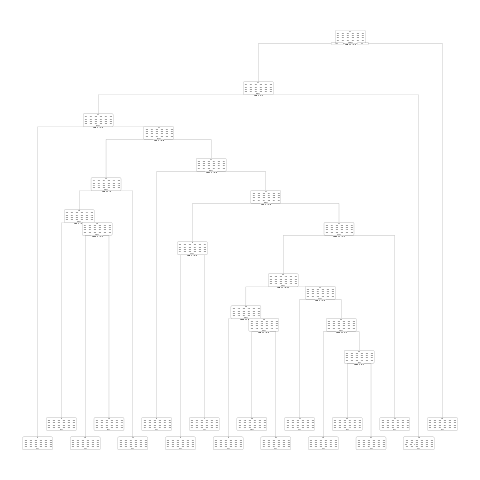

In [ ]:
%%R

#Tuning a Tree Model

#use the 1sd rule
cptarg3 = sqrt(rpart.fit3$cptable[10,1]*rpart.fit3$cptable[9,1])
cptarg3

#obtain the tree corresponding to above `cp` value
prunedtree3 = prune(rpart.fit3,cp=cptarg3) #prunedtree

#plot the tree corresponding to above `cp` value
rpart.plot(prunedtree3)


In [ ]:
%%R

#prediction on testing data

rpart.prediction3 = predict(prunedtree3, newdata = test_lda, type = "class")
#rpart.prediction
tree_table3 = table(`Actual Class` = as.factor(test_lda$label), `Predicted Class` = rpart.prediction3)
tree_table3

tree_accuracy3 = round(accuracy(test_lda$label, rpart.prediction3),4)
print(paste("The accuracy through Decision trees is:",tree_accuracy3))



[1] "The accuracy through Decision trees is: 0.2242"


### **Decision Trees - reduced-Fknn data**

In [ ]:
%%R

#fit the model
tree_model = C5.0(x = train_fknn[, -1], y = as.factor(train_fknn[, 1]), 
                  trials = 20, control = C5.0Control(noGlobalPruning = FALSE, 
                  CF = 0.15, minCases = 3, 
                  winnow = FALSE, earlyStopping = TRUE))

#prediction on test data
tree_model_predictions = predict(tree_model, test_fknn[, -1], type = "class")

#confusion matrix
table(test_fknn[,1], tree_model_predictions)

#accuracy calculation
fknn_accuracy = round(accuracy(test_fknn[,1], tree_model_predictions),4)
print(paste("The accuracy through FKNN with k = 8 is:",fknn_accuracy))


[1] "The accuracy through FKNN with k = 8 is: 0.7658"


## **4. Extra Trees**

Extremely Randomized Trees(ERT) are very similar to Random Forest(RF). There are essentially two main differences:

1. ERT do not resample observations when building a tree. (They do not perform bagging.)
2. ERT do not use the “best split.”

Like a RF, ERT select a random subset of predictors for each split. (A tuning parameter: mtry)
Instead of the “best split” for the predictors, ERT makes a small number of randomly chosen splits-points for each of the selected predictors. In the original method, this value was 1. (A tuning parameter: numRandomCuts)
ERT then selects the “best split” from this small number of choices.
The resulting “forest” contains trees that are more variable, but less correlated than the trees in a Random Forest. Details of the method can be found in the original paper.

As most papers do, the claim is that Extremely Randomized Trees are better than Random Forests. In practice, you will find this is certainly true sometimes, but not always. 

ERT can be used for both classification and regression, much like a RF. 

The ERT model has two parameters:

1. mtry which works in the same way as RF.
2. numRandomCuts which determines the number of randomly chosen splits for each of the mtry predictors selected for each split. Lower values make trees more random.

When specifying the grid of values, we only use selected values of mtry and only “small” values of numRandomCuts to keep computation time somewhat reasonable. (Remember we’re cross-validating which takes more time) Usually numRandomCuts is probably kept smaller than these values, say 1:5 but these values were chosen for the plot below. A value of 1 is the value for the originally specified ERT method.

### **Extra Trees on original data**

In [ ]:
%%R

install.packages("rJava")
library(rJava) 

install.packages("extratrees")
library(extraTrees)

### **Extra Trees on reduced-pca data**

In [ ]:
%%R



### **Extra Trees on reduced-lda data**

In [ ]:
%%R



## **5. Support Vector Machines**

In [ ]:
%%R

install.packages("e1071")
install.packages("kernlab")
library(e1071)
library(kernlab)

### **SVM on original data**

In [ ]:
%%R
is.factor(test$label)

[1] TRUE


In [ ]:
%%R

svm.fit1 = svm(train[,-1], train$label, kernel="radial", cost=1)


svm_test_pred1 = predict(svm.fit1, newdata = test[,-1])
table(as.factor(test$label), svm_test_pred1)
svm_accuracy1 = round(accuracy(test$label, svm_test_pred1),4)
print(paste("The accuracy through SVM on testing data is:", svm_accuracy1))

In [ ]:
%%R


In [ ]:
%%R


#create dataframe
dataframe_train = data.frame(Y_train, X_train)
#set costgrid
cost.grid1 = expand.grid(C = seq(0.2, 2, length = 10))
#set traincontrol
train_control1 = trainControl(method="cv", number=5)

#fit the model
svm_linear1 = train(as.factor(train$label) ~ ., data = dataframe_train, 
                   method = "svmLinear", 
                   trControl = train_control1, tuneGrid = cost.grid1)

#print the model
svm_linear1

#test with test data
pred1 = predict(svm_linear1, newdata = test[,-1])

#testing data accuracy
testing_data_accuracy1 = sum(pred1 == test[,1])/length(test[,1])
print(paste("The testing data accuracy for this model is:", testing_data_accuracy1))





In [ ]:
%%R



In [ ]:
%%R



### **SVM on reduced-pca data**

In [ ]:
%%R

svm.fit2 = svm(train_pca[,-1],  as.factor(train_pca$label), kernel="radial", cost=1)

svm_test_pred2 = predict(svm.fit2, newdata = test_pca[,-1])
table(as.factor(test_pca$label), svm_test_pred2)

accuracy = function(actual, predicted) 
{
  mean(actual == predicted)
}

svm_accuracy2 = round(accuracy(test_pca$label, svm_test_pred2),4)
print(paste("The accuracy through SVM on testing data is:", svm_accuracy2))



[1] "The accuracy through SVM on testing data is: 0.8187"


In [ ]:
%%R

svm_tune1 = tune(svm, train.x = train_pca[,-1], train.y = as.factor(train_pca$label), kernel = "radial", 
                 type = "C-classification",
                 ranges = list(cost = c(0.1,1, 2),
                 gamma = c(0.01, 0.05, 0.1)))

svm_tune1$best.model

From cffi callback <function _processevents at 0x7fe3dbb72ef0>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/rpy2/rinterface_lib/callbacks.py", line 274, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt


In [ ]:
%%R



In [ ]:
%%R



In [ ]:
%%R



### **SVM on reduced-lda data**

In [ ]:
%%R

cost = c(100,1000,10000)
gamma = c(0.00001, 0.0001, 0.001)

for (i in 1:length(cost))
{
  for (j in 1:length(gamma))
  {
    cost_0 = cost[i]
    gamma_0 = gamma[j]
    svm.fit_radial_lda = svm(train_lda[,-1],  as.factor(train_lda$label), kernel="radial", cost=cost_0, gamma = gamma_0)
    pred = predict(svm.fit_radial_lda, test_lda[,-1])
    Accuracy = 100 * (mean(test_lda$label == pred))
    print(paste("cost:", cost_0))
    print(paste("gamma:", gamma_0))
    print(paste("Accuracy:", Accuracy))
  }
}




[1] "cost: 100"
[1] "gamma: 1e-05"
[1] "Accuracy: 40.9509202453988"
[1] "cost: 100"
[1] "gamma: 1e-04"
[1] "Accuracy: 40.9230340211935"
[1] "cost: 100"
[1] "gamma: 0.001"
[1] "Accuracy: 40.4489682097044"
[1] "cost: 1000"
[1] "gamma: 1e-05"
[1] "Accuracy: 40.9090909090909"
[1] "cost: 1000"
[1] "gamma: 1e-04"
[1] "Accuracy: 40.1979921918572"
[1] "cost: 1000"
[1] "gamma: 0.001"
[1] "Accuracy: 39.7518126045733"
[1] "cost: 10000"
[1] "gamma: 1e-05"
[1] "Accuracy: 40.1979921918572"
[1] "cost: 10000"
[1] "gamma: 1e-04"
[1] "Accuracy: 39.7518126045733"
[1] "cost: 10000"
[1] "gamma: 0.001"
[1] "Accuracy: 39.7378694924707"


In [ ]:
%%R

##do not use this code
svm_tune3 = tune(svm, train.x = train_lda[,-1], train.y = as.factor(train_lda$label), kernel = "radial", 
                 type = "C-classification",
                 ranges = list(cost = c(0.1,1),
                 gamma = c(0.01, 0.05)))

svm_tune3$best.model



Call:
best.tune(method = svm, train.x = train_lda[, -1], train.y = as.factor(train_lda$label), 
    ranges = list(cost = c(0.1, 1), gamma = c(0.01, 0.05)), kernel = "radial", 
    type = "C-classification")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  2251



In [ ]:
%%R

table(true = train_lda$label, pred = predict(svm_tune3$best.model,
                                             newx = test_lda[,-1])))



RParsingError: ignored

In [ ]:
%%R



In [ ]:
%%R



## **6. LDA as Linear Classifier**

### **LDA on original data**

In [ ]:
%%R

library(MASS)

#Fitting LDA on the training data
lda.fit1 = lda(label~.,data = train)

#doing prediction in the training data using LDA
lda_pred1 = predict(lda.fit1, newdata = test)

#confusion matrix
cm_lda1 = table(lda_pred1$class,Y_test)

#training accuracy using LDA classifier
test_accuracy = mean(lda_pred1$class == Y_test)
sprintf("Testing Accuracy on Raw Data using LDA Classifier: %f",test_accuracy)

[1] "Testing Accuracy on Raw Data using LDA Classifier: 0.432655"


### **LDA Classifier on reduced-pca data**



In [ ]:
%%R

library(MASS)

#Fitting LDA on the training data
lda.fit2 = lda(label~.,data = train_pca)

#doing prediction in the training data using LDA
lda_pred2 = predict(lda.fit2, newdata = test_pca)

Prediction = lda_pred2$class
Actual = Y_test

#confusion matrix
cm_lda2 = table(Prediction,Actual)

#training accuracy using LDA classifier
test_accuracy = mean(lda_pred2$class == Y_test)
sprintf("Testing Accuracy on Reduced-PCA data using LDA Classifier: %f",test_accuracy)

[1] "Testing Accuracy on Reduced-PCA data using LDA Classifier: 0.620747"


In [ ]:
%%R
#Visualizing the confusion matrix

cm_lda2


          Actual
Prediction   A   B   C   D   E   F   G   H   I   K   L   M   N   O   P   Q   R
         A 295   0   0   0   0   0   0   0   0   0   0  20  63   0   0   0   0
         B   0 290   0   0   0   0   0   0   6   0   0   0   2   0   0   0   0
         C   0   0 266   0   0   0   0   0   0   0   1   0   0   0   0   0   0
         D   0  20   0 169   0   1   0   0   3   6   0   2   0   0   0   0   0
         E   0   0   0   0 398   0   0  21   0   0   0  37  23   0   0   0   0
         F   0   0   0   0   0 145   0   0   0  21   0   0   0  42   0  14   0
         G   0   0   0   0   0   0 164  41   0   0   0   0   0   0  23   0   0
         H   0   0   0   0   0   0  23 249   0   0   0   0   0   0   0   0   0
         I   0  20   0   0   0   0   0  22 179   2   0   3   0   0  14   0   0
         K   0  35   0   0   0   0   0   0   0 184   0   0   0   0   0   0   0
         L   0   0  23   0   0  21   0  20   0   0 188   0   0   0   0   0  21
         M   0   0   0   0  20   0 

In [ ]:
%%R
#Label wise misclassification

mis = rep(1,24)
names(mis) <- levels(train$label)
for(i in 1:24){
  mis[i]=(sum(cm_lda2[,i])-cm_lda2[i,i])/sum(cm_lda2[,i])
}

pca_lda_misclassication = sort(mis, decreasing = TRUE)
print(pca_lda_misclassication)

        N         U         S         W         G         Y         V         R 
0.7250859 0.6954887 0.6016260 0.5339806 0.5287356 0.5000000 0.4797688 0.4722222 
        M         K         H         F         I         O         T         B 
0.4517766 0.4441088 0.4288991 0.4129555 0.3784722 0.3536585 0.3346774 0.3287037 
        X         D         Q         E         C         P         A         L 
0.3146067 0.3102041 0.2560976 0.2008032 0.1419355 0.1268012 0.1087613 0.1004785 


### **LDA Classifier on reduced-lda data**



In [ ]:
%%R

library(MASS)

#Fitting LDA on the training data
lda.fit3 = lda(label~.,data = train_lda)

#doing prediction in the training data using LDA
lda_pred3 = predict(lda.fit3, newdata = test_lda)

#confusion matrix
cm_lda3 = table(lda_pred3$class,Y_test)

#training accuracy using LDA classifier
test_accuracy = mean(lda_pred3$class == Y_test)
sprintf("Testing Accuracy on Reduced-PCA data using LDA Classifier: %f",test_accuracy)

[1] "Testing Accuracy on Reduced-PCA data using LDA Classifier: 0.432655"


## **7. QDA for Multi Classification**

### **QDA on original data**

In [ ]:
%%R

#Fitting QDA
qda.fit1 = qda(as.factor(label) ~ ., data = train) 

#prediction
qda_pred1 = predict(qda.fit1, newdata = test)

#
cm_qda1 = table(qda_pred1$class,Y_test)

# Model Evaluation
test_accuracy_qda1 = mean(qda_pred1$class == Y_test)
sprintf("Testing Accuracy on original data using QDA: %f",test_accuracy_qda1)

[1] "Testing Accuracy on original data using QDA: 0.657418"


In [ ]:
%%R
#Label wise misclassification

mis = rep(1,24)
names(mis) <- levels(train$label)
for(i in 1:24){
  mis[i]=(sum(cm_qda1[,i])-cm_qda1[i,i])/sum(cm_qda1[,i])
}

original_qda_misclassication = sort(mis, decreasing = TRUE)
print(original_qda_misclassication)

          P           V           E           H           M           T 
0.815561960 0.696531792 0.616465863 0.614678899 0.596446701 0.415322581 
          X           U           B           Y           O           K 
0.389513109 0.387218045 0.375000000 0.367469880 0.317073171 0.311178248 
          G           N           I           W           L           S 
0.293103448 0.264604811 0.211805556 0.101941748 0.100478469 0.081300813 
          D           C           R           F           A           Q 
0.077551020 0.067741935 0.027777778 0.008097166 0.000000000 0.000000000 


### **QDA Classifier on reduced-pca data**

In [ ]:
%%R

#Fitting QDA
qda.fit2 = qda(as.factor(label) ~ ., data = train_pca) 

#prediction
qda_pred2 = predict(qda.fit2, newdata = test_pca)

Prediction = qda_pred2$class
Actual = Y_test

cm_qda2 = table(Prediction,Actual)

# Model Evaluation
test_accuracy_qda2 = mean(Prediction == Actual)
sprintf("Testing Accuracy on Reduced-PCA data using QDA Classifier: %f",test_accuracy_qda2)

[1] "Testing Accuracy on Reduced-PCA data using QDA Classifier: 0.715282"


In [ ]:
%%R
#Confusion Matrix
print(cm_qda2)

          Actual
Prediction   A   B   C   D   E   F   G   H   I   K   L   M   N   O   P   Q   R
         A 331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
         B   0 358   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
         C   0   0 285   0   0   0   0   0   0   0   0   0   0   0   0   0   0
         D   0   0   0 225   0   0   0   0   0   0   0   0   0   0   0   0   0
         E   0   0   0   0 373   0   0   0   0   0   0   0   0   0   0   0   0
         F   0   0   0   0   0 226   0   0   0   0   0   0   0   0   0   0   0
         G   0   0   0   0   0   0 229  21   0   0   0   0   0   0   0   0   0
         H   0   0   0   0   0   0   0 265   0   0   0   0   0   0   0   0   0
         I   0   0   0   0   0   0   0   0 220   0   0   0   0   0   0   0   0
         K   0  35   0   0   0   0   0   0   0 192   0   0   0   0   0   0   0
         L   0   0   0   0   0   0   0   0   0   0 188   0   0   0   0   0   0
         M   0   0   0   0  20   0 

In [ ]:
%%R
#Label wise misclassification

mis = rep(1,24)
names(mis) <- levels(train$label)
for(i in 1:24){
  mis[i]=(sum(cm_qda2[,i])-cm_qda2[i,i])/sum(cm_qda2[,i])
}

pca_qda_misclassication = sort(mis, decreasing = TRUE)
print(pca_qda_misclassication)

         P          X          V          T          R          K          H 
0.80979827 0.54681648 0.52890173 0.50000000 0.42361111 0.41993958 0.39220183 
         M          U          G          O          E          I          N 
0.36040609 0.35714286 0.34195402 0.25609756 0.25100402 0.23611111 0.21649485 
         Y          B          S          L          F          D          C 
0.18373494 0.17129630 0.16260163 0.10047847 0.08502024 0.08163265 0.08064516 
         A          Q          W 
0.00000000 0.00000000 0.00000000 


### **QDA Classifier on reduced-lda data**

In [ ]:
%%R

#Fitting QDA
qda.fit3 = qda(as.factor(label) ~ ., data = train_lda) 

#prediction
qda_pred3 = predict(qda.fit3, newdata = test_lda)
cm_qda3 = table(qda_pred3$class,Y_test)

# Model Evaluation
test_accuracy_qda3 = mean(qda_pred3$class == Y_test)
sprintf("Testing Accuracy on Reduced-LDA data using QDA Classifier: %f",test_accuracy_qda3)

[1] "Testing Accuracy on Reduced-LDA data using QDA Classifier: 0.374094"


## **8. Naive Bayes Classifier**

### **NB on original data**

In [ ]:
%%R

# Installing Packages
install.packages("e1071")
 
# Loading package
library(e1071)

In [ ]:
%%R

# Fitting Naive Bayes Model to training dataset
nb.fit1 = naiveBayes(as.factor(label)~.,data = train)
 
# Predicting on test data
nb_pred1 = predict(nb.fit1, newdata = test)
 
# Confusion Matrix
cm_nb1 = table(Y_test, nb_pred1)
 
# Model Evaluation
test_accuracy_nb1 = mean(nb_pred1 == Y_test)
sprintf("Testing Accuracy on original data using NB classifier: %f",test_accuracy_nb1)


[1] "Testing Accuracy on original data using NB classifier: 0.389710"


### **NB on reduced-pca data**

In [ ]:
%%R
# Fitting Naive Bayes Model to training dataset
nb.fit2 = naiveBayes(as.factor(label)~.,data = train_pca)
 
# Predicting on test data
nb_pred2 = predict(nb.fit2, newdata = test_pca)

Predicted = nb_pred2
Actual = Y_test
 
# Confusion Matrix
cm_nb2 = table(Prediction, Actual)
 
# Model Evaluation
test_accuracy_nb2 = mean(nb_pred2 == Y_test)
sprintf("Testing Accuracy on reduced-pca data using NB classifier: %f",test_accuracy_nb2)

[1] "Testing Accuracy on reduced-pca data using NB classifier: 0.622839"


In [ ]:
%%R
#Label wise misclassification

mis = rep(1,24)
names(mis) <- levels(train$label)
for(i in 1:24){
  mis[i]=(sum(cm_nb2[,i])-cm_nb2[i,i])/sum(cm_nb2[,i])
}

pca_nb_misclassication = sort(mis, decreasing = TRUE)
print(pca_nb_misclassication)

         P          X          V          T          R          K          H 
0.80979827 0.54681648 0.52890173 0.50000000 0.42361111 0.41993958 0.39220183 
         M          U          G          O          E          I          N 
0.36040609 0.35714286 0.34195402 0.25609756 0.25100402 0.23611111 0.21649485 
         Y          B          S          L          F          D          C 
0.18373494 0.17129630 0.16260163 0.10047847 0.08502024 0.08163265 0.08064516 
         A          Q          W 
0.00000000 0.00000000 0.00000000 


### **NB on reduced-lda data**

In [ ]:
%%R

# Loading package
library(e1071)

# Fitting Naive Bayes Model to training dataset
nb.fit3 = naiveBayes(as.factor(label)~.,data = train_lda)
 
# Predicting on test data
nb_pred3 = predict(nb.fit3, newdata = test_lda)
 
# Confusion Matrix
cm_nb3 = table(Y_test, nb_pred3)
 
# Model Evaluation
test_accuracy_nb3 = mean(nb_pred3 == Y_test)
sprintf("Testing Accuracy on reduced-lda data using NB classifier: %f",test_accuracy_nb3)

[1] "Testing Accuracy on reduced-lda data using NB classifier: 0.438371"


## **9. Random Forest**

### **RF on original Data**

In [ ]:
%%R

install.packages('randomForest')
library(randomForest)

In [ ]:
%%R
set.seed(1)

###############################ORIGINAL DATA#######################################
rf.fit1 = randomForest(as.factor(label) ~. ,data = train, importance = TRUE, ntree = 200)

#prediction
rf.predY1 = predict(rf.fit1, newdata = test,type = "class")

Actual = Y_test
Prediction = rf.predY1

# Confusion Matrix
cm1 = table(Prediction, Actual)

# Model Evaluation
test_accuracy_rf1 = mean(rf.predY1 == Y_test)

sprintf("Testing Accuracy on original data using RF: %f",test_accuracy_rf1)

In [ ]:
%%R

#Visualizing the confusion matrix
print(cm1)       
 

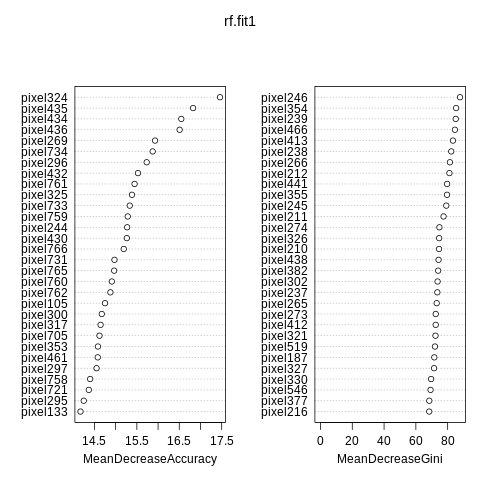

In [ ]:
%%R
#Feature Importance (Top 15 Pixels)

par(mfrow=c(1,2))
barplot(sort(rf.fit1$importance[,25], decreasing = TRUE)[1:15],horiz = TRUE, las = 1, main = "MeanDecreaseAccuracy")

barplot(sort(rf.fit1$importance[,26], decreasing = TRUE)[1:15],horiz = TRUE,las = 1,main = "MeanDecreaseGini")

### **RF on reduced-PCA data**

In [ ]:
%%R
set.seed(1)

rf.fit2 = randomForest(as.factor(label) ~ . , data = train_pca, importance = TRUE, ntree = 200)

#prediction
rf.predY2 = predict(rf.fit2, newdata = test_pca,type = "class")

# Confusion Matrix
cm2 = table(Y_test, rf.predY2)

# Model Evaluation
test_accuracy_rf2 = mean(rf.predY2 == Y_test)

sprintf("Testing Accuracy on reduced pca data using RF (without tuning): %f",test_accuracy_rf2)

[1] "Testing Accuracy on reduced pca data using RF (without tuning): 0.816788"


      nodesize  accuracy        error
 [1,]        1 1.0000000 0.0000000000
 [2,]        5 1.0000000 0.0000000000
 [3,]       10 1.0000000 0.0000000000
 [4,]       15 1.0000000 0.0000000000
 [5,]       20 1.0000000 0.0000000000
 [6,]       25 1.0000000 0.0000000000
 [7,]       30 1.0000000 0.0000000000
 [8,]       35 1.0000000 0.0000000000
 [9,]       40 1.0000000 0.0000000000
[10,]       50 1.0000000 0.0000000000
[11,]       60 0.9998786 0.0001214182
[12,]       70 1.0000000 0.0000000000
[13,]       80 0.9997572 0.0002428363
[14,]      120 0.9952647 0.0047353084
[15,]      150 0.9848227 0.0151772705


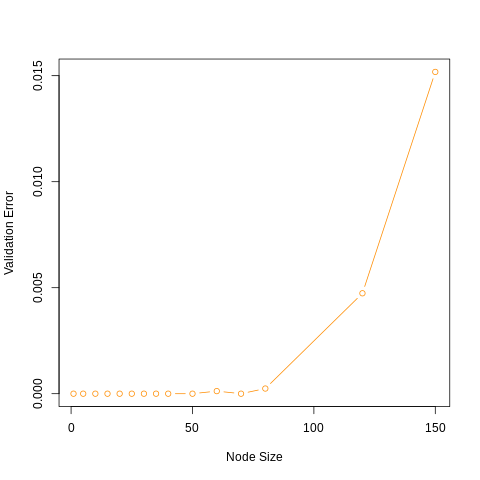

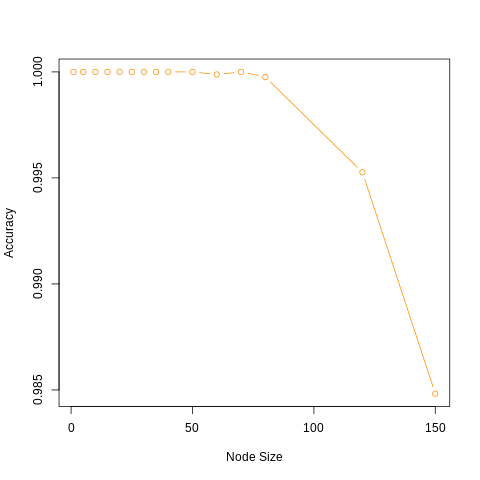

In [ ]:
%%R
#tuning for node size

set.seed(1)

nodesize = c(1, 5, 10, 15,20,25,30,35,40,50,60,70,80,120,150)

accuracy = c()
error = c()

#Sample Indexes
indexes = sample(1:nrow(train_pca), size = 0.3 * nrow(train_pca))

# Split dataset into training and test set
test_split_pca = train_pca[indexes, ]
train_split_pca  = train_pca[-indexes, ]

#dim(test_split_pca)
#dim(train_split_pca)

for (i in 1:length(nodesize))
{
  rf.fit = randomForest(label ~., data = train_split_pca, 
                        ntree = 200, mtry = 10, nodesize = nodesize[i])
  
  #prediction
  rf.predY = predict(rf.fit, newdata = test_split_pca,type = "class")
  
  Prediction = rf.predY
  Actual = test_split_pca$label

  # Model Evaluation
  accuracy[i] = mean(Prediction == Actual)
  error[i] = mean(Prediction != Actual)
}

mat1 = cbind(nodesize,accuracy,error)
print(mat1)

plot(nodesize,error,type = "b", col = "darkorange",xlab = "Node Size",ylab = "Validation Error")
plot(nodesize,accuracy,type = "b", col = "darkorange",xlab = "Node Size",ylab = "Accuracy")


      mtry accuracy error
 [1,]    5        1     0
 [2,]    6        1     0
 [3,]    7        1     0
 [4,]    8        1     0
 [5,]    9        1     0
 [6,]   10        1     0
 [7,]   11        1     0
 [8,]   12        1     0
 [9,]   13        1     0
[10,]   14        1     0
[11,]   15        1     0
[12,]   16        1     0
[13,]   17        1     0
[14,]   18        1     0
[15,]   19        1     0
[16,]   20        1     0


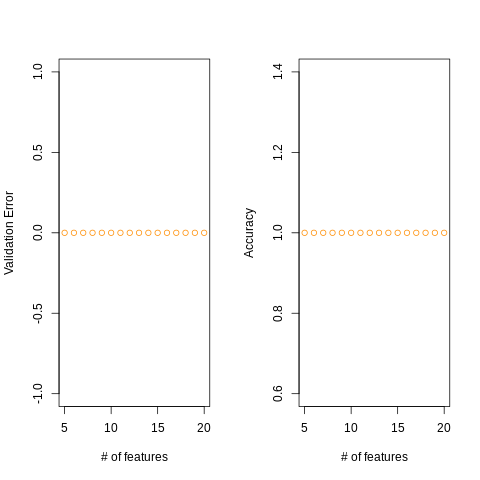

In [ ]:
%%R

#Tuning for mtry

set.seed(1)

mtry = 5:20

accuracy = c()
error = c()

#Sample Indexes
indexes = sample(1:nrow(train_pca), size = 0.3 * nrow(train_pca))

# Split dataset into training and test set
test_split_pca = train_pca[indexes, ]
train_split_pca  = train_pca[-indexes, ]

dim(test_split_pca)
dim(train_split_pca)

for (i in 1:length(mtry))
{
  rf.fit = randomForest(label ~., data = train_split_pca, 
                        ntree = 200, mtry = mtry[i], nodesize = 10)
  
  #prediction
  rf.predY = predict(rf.fit, newdata = test_split_pca,type = "class")
  
  Prediction = rf.predY
  Actual = test_split_pca$label


  # Model Evaluation
  accuracy[i] = mean(Prediction == Actual)
  error[i] = mean(Prediction != Actual)
}

mat2 = cbind(mtry,accuracy,error)
print(mat2)

par(mfrow=c(1,2))
plot(mtry,error,type = "b", col = "darkorange",xlab = "# of features",ylab = "Validation Error")
plot(mtry,accuracy,type = "b", col = "darkorange",xlab = "# of features",ylab = "Accuracy")


      nodesize  accuracy     error
 [1,]        1 0.8269660 0.1730340
 [2,]        5 0.8284997 0.1715003
 [3,]       10 0.8356107 0.1643893
 [4,]       15 0.8096765 0.1903235
 [5,]       20 0.8153932 0.1846068
 [6,]       25 0.8250139 0.1749861
 [7,]       30 0.8095371 0.1904629
 [8,]       35 0.8318461 0.1681539
 [9,]       40 0.8241774 0.1758226
[10,]       50 0.8056330 0.1943670
[11,]       60 0.8053542 0.1946458
[12,]       70 0.7964306 0.2035694
[13,]       80 0.7851366 0.2148634
[14,]      100 0.7720301 0.2279699
[15,]      120 0.7833240 0.2166760


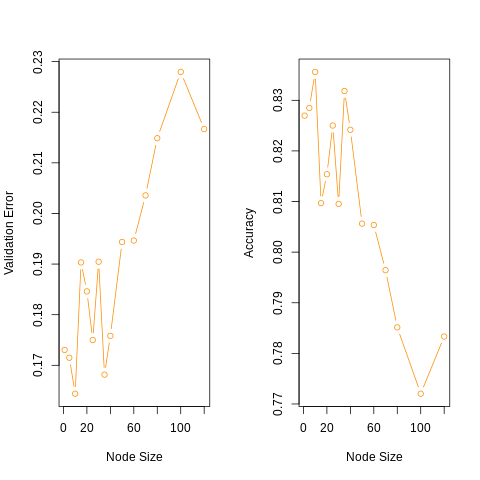

In [ ]:
%%R

#Checking accuracy in test data for different node size. this is basically cheating :P
set.seed(1)

nodesize = c(1, 5, 10, 15,20,25,30,35,40,50,60,70,80,100,120)

accuracy = c()
error = c()

for (i in 1:length(nodesize))
{
  rf.fit = randomForest(label ~., data = train_pca, 
                        ntree = 200, mtry = 10, nodesize = nodesize[i])
  
  #prediction
  rf.predY = predict(rf.fit, newdata = test_pca,type = "class")
  
  Prediction = rf.predY
  Actual = test_pca$label

  # Model Evaluation
  accuracy[i] = mean(Prediction == Actual)
  error[i] = mean(Prediction != Actual)
}

mat2 = cbind(nodesize,accuracy,error)
print(mat2)

par(mfrow=c(1,2))
plot(nodesize,error,type = "b", col = "darkorange",xlab = "Node Size",ylab = "Validation Error")
plot(nodesize,accuracy,type = "b", col = "darkorange",xlab = "Node Size",ylab = "Accuracy")

In [ ]:
%%R
#Final rf model with mtry = 10, nodesize = 10

set.seed(1)

rf.fit_final = randomForest(label ~., data = train_pca, 
                        ntree = 200, mtry = 10, nodesize = 10, importance = TRUE)

#prediction
rf.predY_final = predict(rf.fit_final, newdata = test_pca,type = "class")
  
Prediction = rf.predY_final
Actual = test_pca$label

# Model Evaluation
test_accuracy_rf_final = mean(Prediction == Actual)
test_error_rf_final = mean(Prediction != Actual)

#Confusion Matrix
cm_rf_final = table(Prediction,Actual)

sprintf("Testing Accuracy on PCA-reduced data using Final Tuned RF: %f",test_accuracy_rf_final)


[1] "Testing Accuracy on PCA-reduced data using Final Tuned RF: 0.813441"


In [ ]:
%%R
#confusion matrix for test predictions

print(cm_rf_final)

          Actual
Prediction   A   B   C   D   E   F   G   H   I   K   L   M   N   O   P   Q   R
         A 331   0   0   0   0   0   0   0  19   0   0  18  22   0   0  12   0
         B   0 384   0   0   0   0   0   0  16   0   0   0   0   0   0   0   0
         C   0   0 309   0   0   2   0   0   0   0   0   0   0  15   0   0   0
         D   0   9   0 226   0   0   0   0   0  30   0   0   0   0   0   0   0
         E   0   0   0   0 465   0   0   0   0   0   0  13   1   0   0   0   0
         F   0   0   0   0   0 226   0   0   0   0   0   0   1   1   0   0   0
         G   0   0   0   0   0   0 277  20   1   0   0   0   2   0   0   0   0
         H   0   0   0   0   0   0   1 413   0   0   0   0   0   0   0   0   0
         I   0   0   0   0   0   2   0   0 190   0   0   7   0   0   0   0   0
         K   0  38   0   0   0   0   0   0   0 209   0   0   0   1   0   0   3
         L   0   0   1   0   0  17   0   0   1   2 209   0   0   0   0   0  10
         M   0   0   0   0   0   0 

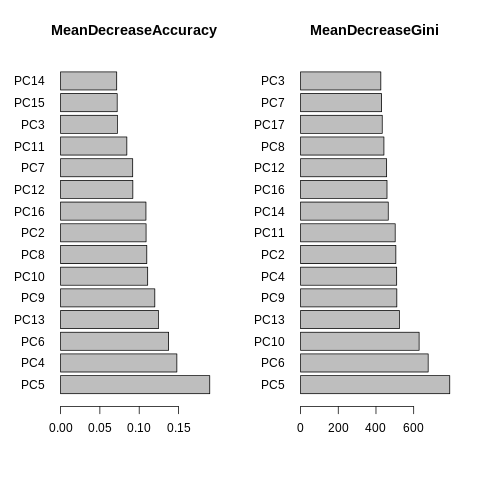

In [ ]:
%%R
#Feature Importance (Top 15 PCs)

par(mfrow=c(1,2))
barplot(sort(rf.fit_final$importance[,25], decreasing = TRUE)[1:15],horiz = TRUE, las = 1, main = "MeanDecreaseAccuracy")

barplot(sort(rf.fit_final$importance[,26], decreasing = TRUE)[1:15],horiz = TRUE,las = 1,main = "MeanDecreaseGini")

In [ ]:
%%R
#Label wise misclassification

mis = rep(1,24)
names(mis) <- levels(train$label)
for(i in 1:24){
  mis[i]=(sum(cm_rf_final[,i])-cm_rf_final[i,i])/sum(cm_rf_final[,i])
}

rf_misclassication = sort(mis, decreasing = TRUE)
print(rf_misclassication)

          V           W           R           K           U           I 
0.560693642 0.451456311 0.375000000 0.368580060 0.345864662 0.340277778 
          M           S           N           Y           G           T 
0.317258883 0.288617886 0.274914089 0.243975904 0.204022989 0.185483871 
          O           B           F           X           D           Q 
0.126016260 0.111111111 0.085020243 0.078651685 0.077551020 0.073170732 
          E           H           P           C           A           L 
0.066265060 0.052752294 0.005763689 0.003225806 0.000000000 0.000000000 


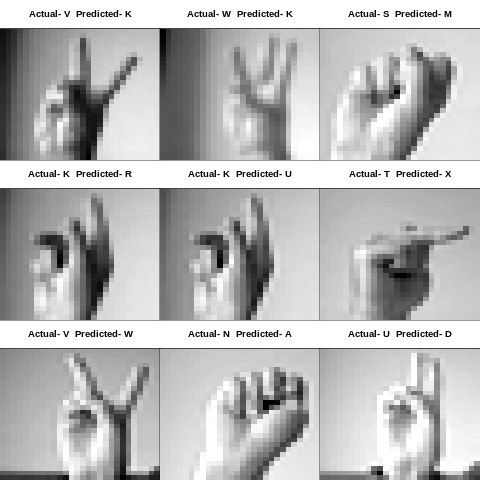

In [ ]:
%%R

#Visualizing the missclassifications

par(mfcol=c(3,3))
par(mar=c(0, 0, 3, 0), xaxs='i', yaxs='i')

missed=which(Actual!= Prediction)

for (i in missed[1:9]){
    my_mat=matrix((test[i,2:ncol(test)]), nrow=28, ncol=28)
    my_mat_numbers = apply(my_mat, 2, as.numeric)
    
    my_mat_new = matrix("NA",nrow = 28,ncol = 28)
    for (j in 1:28){
      my_mat_new[,j] = my_mat_numbers[,29-j]
    }
    my_mat_new = apply(my_mat_new, 2, as.numeric)
    
    image(1:28, 1:28, my_mat_new, col=gray((0:255)/255),
          xaxt = 'n', yaxt = 'n',main = paste("Actual-",test[i,1]," Predicted-",Prediction[i]))
}

### **RF on reduced-LDA data**

In [ ]:
%%R

rf.fit3 = randomForest(as.factor(label) ~. ,data = train_lda, importance = TRUE, ntree = 300)

#prediction
rf.predY3 = predict(rf.fit3, newdata = test_lda,type = "class")

# Confusion Matrix
cm3 = table(Y_test, rf.predY3)

# Model Evaluation
test_accuracy_rf3 = mean(rf.predY3 == Y_test)

sprintf("Testing Accuracy on original data using LDA data: %f",test_accuracy_rf3)

[1] "Testing Accuracy on original data using LDA data: 0.399610"


## **10. XG Boost**

Accuracy for scaled and unscaled data (full dataset) is same and is equal to ~ 76%.

Uncertainty while implementing with pca reduced features as those features are not interpretable and hence, predictions on test data do not make sense.

In [ ]:
%%R
install.packages("xgboost")

In [ ]:
%%R
library(xgboost)

In [ ]:
%%R
# Data Preparation for XGBoost
train_label <- as.numeric(train$label)-1
test_label <- as.numeric(test$label)-1

In [ ]:
%%R
sort(unique(train_label))

 [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23


In [ ]:
%%R
## Setting parameters for multi-class classification
num_class=length(unique(train$label))
params = list(
  booster="gbtree",
  objective="multi:softprob",
  eval_metric="mlogloss",
  num_class=num_class
)

### XGBoost on original data

In [ ]:
%%R
## Preparing data for XGBoost
train_matrix <- xgb.DMatrix(data = as.matrix(train[,-1]), label = train_label)
test_matrix <- xgb.DMatrix(data = as.matrix(test[,-1]), label = test_label)

In [ ]:
%%R
## Fitting X
xgb.fit=xgb.train(
  params=params,
  data=train_matrix,
  nrounds=100,
  nthreads=1,
  early_stopping_rounds = 10,
  watchlist=list(val1=train_matrix,val2=test_matrix),
  verbose=0
)

[21:22:05] WARNING: amalgamation/../src/learner.cc:576: 
Parameters: { "nthreads" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




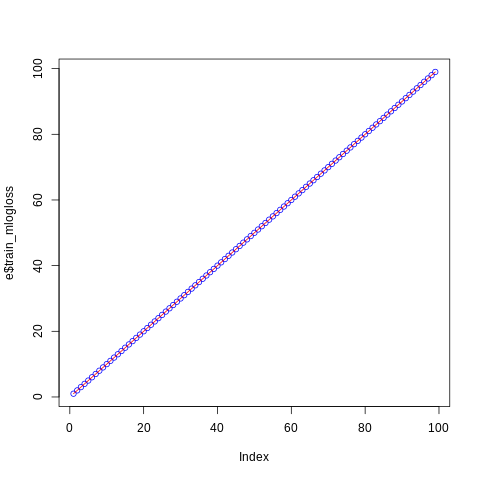

In [ ]:
%%R
## Training & Test Error Plot
e <- data.frame(xgb.fit$evaluation_log)
plot(e$iter, e$train_mlogloss, col = 'blue')
lines(e$iter, e$test_mlogloss, col = 'red')

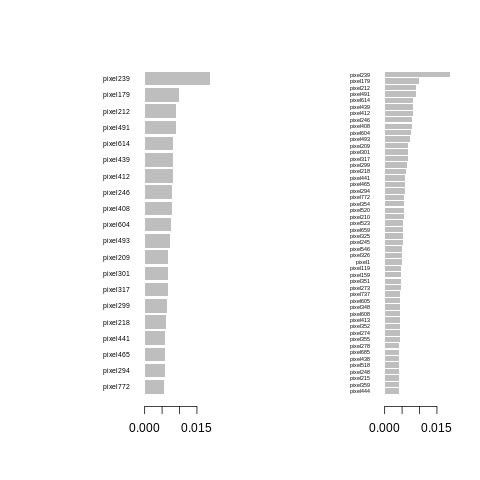

In [ ]:
%%R
## Feature importance
imp_feature <- xgb.importance(colnames(train_matrix), model = xgb.fit)
par(mfrow=c(1,2))
xgb.plot.importance (importance_matrix = imp_feature[1:20]) 
xgb.plot.importance (importance_matrix = imp_feature[1:50]) 

Gain is the most important column. The value decreases as we go down in the column. We can plot the gain column by using xgb.plot.importance.

In [ ]:
%%R
top100=as.list(imp_feature[1:100,1])
top100_df=train[,c("label",top100$Feature)]


par(mfcol=c(3,3))
par(mar=c(0, 0, 3, 0), xaxs='i', yaxs='i')

for (i in 1:9){
    my_mat=matrix((top100_df[i,2:ncol(top100_df)]), nrow=28, ncol=28)
    my_mat_numbers = apply(my_mat, 2, as.numeric)
    image(1:28, 1:28, my_mat_numbers, col=gray((0:255)/255),
          xaxt = 'n', yaxt = 'n',
          main = paste(top100_df[i,1])) 
}

In [ ]:
%%R
## Prediction on the test data
library(tidyverse)
pred <- predict(xgb.fit, newdata = test_matrix)
prediction <- matrix(pred, nrow = num_class, ncol = length(pred)/num_class) %>%
t() %>%
data.frame() %>%
mutate(label = test_label, max_prob = max.col(., "last")-1)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::slice()  masks xgboost::slice()



In [ ]:
%%R
## Confusion Matrix
cm=table(Prediction = prediction$max_prob, Actual = prediction$label)
cm

In [ ]:
%%R
# Misclasssified observations
missed=which(prediction$max_prob!=prediction$label)

In [ ]:
%%R
correct_label=sum(diag(cm))
accuracy=correct_label/nrow(test)
accuracy

[1] 0.7636642


In [ ]:
%%R
## Label-wise misclassifications
misclassifications <- vector(mode="list", length=24)
names(misclassifications) <- levels(train$label)
for(i in 1:24){
  misclassifications[[i]]=sum(cm[,i])-cm[i,i]
}

misclassifications

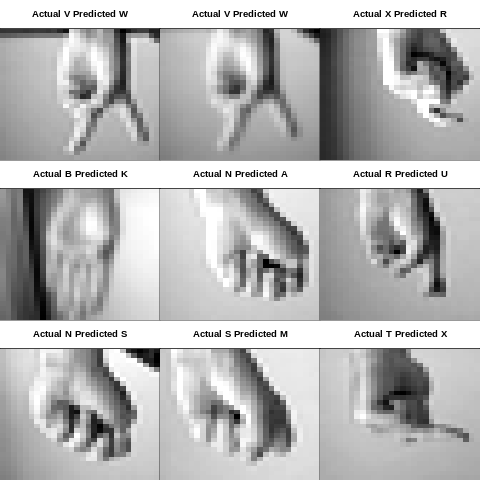

In [ ]:
%%R
par(mfcol=c(3,3))
par(mar=c(0, 0, 3, 0), xaxs='i', yaxs='i')

missed=which(prediction$max_prob!=prediction$label)
english=list("A","B","C","D","E","F","G","H","I","K","L","M","N","O","P","Q","R","S","T","U","V",'W','X',"Y")
for (i in missed[1:9]){
    my_mat=matrix((test[i,2:ncol(test)]), nrow=28, ncol=28)
    my_mat_numbers = apply(my_mat, 2, as.numeric)
    image(1:28, 1:28, my_mat_numbers, col=gray((0:255)/255),
          xaxt = 'n', yaxt = 'n',
          main = paste("Actual",unlist(english[prediction[i,25]+1]),"Predicted",unlist(english[prediction[i,26]+1]))) 
}

### XGBoost on reduced-pca data

In [ ]:
%%R
## Preparing data for XGBoost
train_pca_matrix <- xgb.DMatrix(data = as.matrix(train_pca[,-1]), label = train_label)
test_pca_matrix <- xgb.DMatrix(data = as.matrix(test_pca[,-1]), label = test_label)

In [ ]:
%%R
## Fitting X
xgb.pca_fit=xgb.train(
  params=params,
  data=train_pca_matrix,
  nrounds=100,
  nthreads=1,
  early_stopping_rounds = 10,
  watchlist=list(val1=train_pca_matrix,val2=test_pca_matrix),
  verbose=0
)

[21:40:23] WARNING: amalgamation/../src/learner.cc:576: 
Parameters: { "nthreads" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [ ]:
%%R
## Prediction on the test data
library(tidyverse)
xgb_pca_pred <- predict(xgb.pca_fit, newdata = test_pca_matrix)
xgb_pca_prediction <- matrix(xgb_pca_pred, nrow = num_class, ncol = length(xgb_pca_pred)/num_class) %>%
t() %>%
data.frame() %>%
mutate(label = test_label, max_prob = max.col(., "last")-1)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::slice()  masks xgboost::slice()



In [ ]:
%%R
## Confusion Matrix
xgb_pca_cm=table(Prediction = xgb_pca_prediction$max_prob, Actual = xgb_pca_prediction$label)
xgb_pca_cm

          Actual
Prediction   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
        0  312   0   0   0   0   0   0   0  17   0   0  12  31   0   0   1   0
        1    0 355   0   0   0   0   0   0  16   0   0   0   0   0   0   0   0
        2    0   0 305   0   1   0   0   0   0   0   0   0   0   0   0   0   0
        3    0   2   0 209   0   0   2   0  10   6   0   0   1   0   0   0   0
        4    0  14   0   0 442   0   1   1   3   0   0  21  46   0   0   0   0
        5    0   0   0   0   0 226   0   0   0  28   0   0   0  31   0   0   0
        6    0   0   0   0   0   0 252  76   0   1   0   0   0  20   0   0   0
        7    0   0   0   0   0   0   3 344  12   0   0   0   0   0   0   0   0
        8    0   2   0   0   0   0   0   0 147   3   0   1   4   1   0   0   0
        9    0  33   0   1   1   0   0   0   0 184   0   4   0   0   0   0   6
        10   0   0   1  11   0  21   0   0  12  13 209   0   0   0   0   0  12
        11   1   0   0   0   5   0 

In [ ]:
%%R
# Misclasssified observations
xgb_pca_missed=which(xgb_pca_prediction$max_prob!=xgb_pca_prediction$label)

In [ ]:
%%R
xbg_pca_correct_label=sum(diag(xgb_pca_cm))
xgb_pca_accuracy=xbg_pca_correct_label/nrow(test_pca)
xgb_pca_accuracy

[1] 0.7427496


In [ ]:
%%R

## Label-wise misclassifications
xgb_pca_misclassifications <- vector(mode="list", length=24)
names(xgb_pca_misclassifications) <- levels(train_pca$label)
for(i in 1:24){
  xgb_pca_misclassifications[[i]]=100*(sum(xgb_pca_cm[,i])-xgb_pca_cm[i,i])/sum(xgb_pca_cm[,i])
}

xgb_pca_misclassifications

$A
[1] 5.740181

$B
[1] 17.82407

$C
[1] 1.612903

$D
[1] 14.69388

$E
[1] 11.24498

$F
[1] 8.502024

$G
[1] 27.58621

$H
[1] 21.10092

$I
[1] 48.95833

$K
[1] 44.41088

$L
[1] 0

$M
[1] 39.08629

$N
[1] 56.35739

$O
[1] 28.86179

$P
[1] 2.305476

$Q
[1] 9.146341

$R
[1] 41.66667

$S
[1] 20.73171

$T
[1] 31.85484

$U
[1] 38.7218

$V
[1] 61.84971

$W
[1] 49.51456

$X
[1] 12.35955

$Y
[1] 30.42169



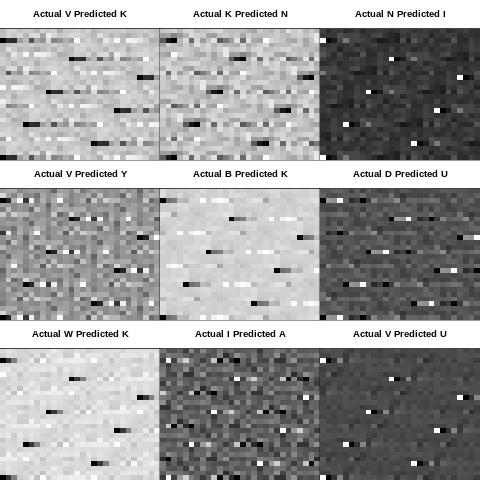

In [ ]:
%%R
par(mfcol=c(3,3))
par(mar=c(0, 0, 3, 0), xaxs='i', yaxs='i')

xgb_pca_missed=which(xgb_pca_prediction$max_prob!=xgb_pca_prediction$label)
english=list("A","B","C","D","E","F","G","H","I","K","L","M","N","O","P","Q","R","S","T","U","V",'W','X',"Y")
for (i in xgb_pca_missed[1:9]){
    my_mat=matrix((test_pca[i,2:ncol(test_pca)]), nrow=28, ncol=28)
    my_mat_numbers = apply(my_mat, 2, as.numeric)
    image(1:28, 1:28, my_mat_numbers, col=gray((0:255)/255),
          xaxt = 'n', yaxt = 'n',
          main = paste("Actual",unlist(english[xgb_pca_prediction[i,25]+1]),"Predicted",unlist(english[xgb_pca_prediction[i,26]+1]))) 
}

### XGBoost on lda-reduced data

In [ ]:
%%R
## Preparing data for XGBoost
train_lda_matrix <- xgb.DMatrix(data = as.matrix(train_lda[,-1]), label = train_label)
test_lda_matrix <- xgb.DMatrix(data = as.matrix(test_lda[,-1]), label = test_label)

In [ ]:
%%R
## Fitting X
xgb.lda_fit=xgb.train(
  params=params,
  data=train_lda_matrix,
  nrounds=100,
  nthreads=1,
  early_stopping_rounds = 10,
  watchlist=list(val1=train_lda_matrix,val2=test_lda_matrix),
  verbose=0
)

[03:48:31] WARNING: amalgamation/../src/learner.cc:576: 
Parameters: { "nthreads" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [ ]:
%%R
## Prediction on the test data
library(tidyverse)
xgb_lda_pred <- predict(xgb.lda_fit, newdata = test_lda_matrix)
xgb_lda_prediction <- matrix(xgb_lda_pred, nrow = num_class, ncol = length(xgb_lda_pred)/num_class) %>%
t() %>%
data.frame() %>%
mutate(label = test_label, max_prob = max.col(., "last")-1)

In [ ]:
%%R
## Confusion Matrix
xgb_lda_cm=table(Prediction = xgb_lda_prediction$max_prob, Actual = xgb_lda_prediction$label)
xgb_lda_cm

          Actual
Prediction   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
        0  224   0   0   0   1   5   0   0   0   2   0  29  38  14   6   2   0
        1    0 252   0  27  34  19   0   0  36  21   0   1   0   0   0   0   0
        2    0   0 232   0   0   0   0   3   0   0   7   0   0   6   0   0   0
        3    2  25   0  79   3   6  16   0  10  13   5   1  14   3   0   0   9
        4    0   2   0   0 171   0   0   0   1   2   0   8   4   0   1   0   0
        5    0  24   0   0   0  63   3  23   0   2  14   9   0   0  36   0   0
        6    1   0   0   8   1   0 129  28   0  40   0   4   2  22  17  34   0
        7   20   0   0   0   0  21  14 153  19   0  37  12   0  20  30   0   5
        8   10   4   0   0   4   2   1   1  26   6   0  47   8   4  35   0   1
        9    0  19   0   2   8  11  13   0  21  65   9   6   5   0  17   0  22
        10   2   0  17  18   4  29   0  21   1  36  40   0   0   4   0   0   1
        11   0   0   0   1  40   0 

In [ ]:
%%R
# Misclasssified observations
xgb_lda_missed=which(xgb_lda_prediction$max_prob!=xgb_lda_prediction$label)

In [ ]:
%%R
xbg_lda_correct_label=sum(diag(xgb_lda_cm))
xgb_lda_accuracy=xbg_lda_correct_label/nrow(test_lda)
xgb_lda_accuracy

[1] 0.3010318


In [ ]:
%%R
## Label-wise misclassifications
xgb_lda_misclassifications <- vector(mode="list", length=24)
names(xgb_lda_misclassifications) <- levels(train_lda$label)
for(i in 1:24){
  xgb_lda_misclassifications[[i]]=sum(xgb_lda_cm[,i])-xgb_lda_cm[i,i]
}

xgb_lda_misclassifications

$A
[1] 107

$B
[1] 180

$C
[1] 78

$D
[1] 166

$E
[1] 327

$F
[1] 184

$G
[1] 219

$H
[1] 283

$I
[1] 262

$K
[1] 266

$L
[1] 169

$M
[1] 319

$N
[1] 277

$O
[1] 171

$P
[1] 315

$Q
[1] 108

$R
[1] 127

$S
[1] 187

$T
[1] 216

$U
[1] 169

$V
[1] 272

$W
[1] 152

$X
[1] 219

$Y
[1] 240



# D. Combining Labels

## Level-1 XGBoost

In [ ]:
%%R
library(dplyr, warn.conflicts = FALSE)
library(forcats)

train_comb_label=train[,1:785]
glimpse(train$label)
train_comb_label$label <- fct_collapse(train_comb_label$label, AEMNS = c("A","E","M","N","S"))
train_comb_label$label <- fct_collapse(train_comb_label$label, GHT = c("G","H","T"))
train_comb_label$label <- fct_collapse(train_comb_label$label, URD = c("U","R","D"))
glimpse(train_comb_label$label)

test_comb_label=test[,1:785]
glimpse(test$label)
test_comb_label$label <- fct_collapse(test_comb_label$label, AEMNS = c("A","E","M","N","S"))
test_comb_label$label <- fct_collapse(test_comb_label$label, GHT = c("G","H","T"))
test_comb_label$label <- fct_collapse(test_comb_label$label, URD = c("U","R","D"))
glimpse(test_comb_label$label)

 Factor w/ 24 levels "A","B","C","D",..: 4 7 3 3 13 16 9 22 4 4 ...
 Factor w/ 16 levels "AEMNS","B","C",..: 4 6 3 3 1 12 7 14 4 4 ...
 Factor w/ 24 levels "A","B","C","D",..: 7 6 10 1 4 21 10 14 4 8 ...
 Factor w/ 16 levels "AEMNS","B","C",..: 6 5 8 1 4 13 8 10 4 6 ...


In [ ]:
%%R
levels(train_comb_label$label)

 [1] "AEMNS" "B"     "C"     "URD"   "F"     "GHT"   "I"     "K"     "L"    
[10] "O"     "P"     "Q"     "V"     "W"     "X"     "Y"    


In [ ]:
%%R
## Preparing data for XGBoost
tr_comb_label <- as.numeric(train_comb_label$label)-1
print(sort(unique(tr_comb_label)))

 [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15


In [ ]:
%%R
## Preparing data for XGBoost
tr_comb_label <- as.numeric(train_comb_label$label)-1
train_comb_matrix <- xgb.DMatrix(data = as.matrix(train_comb_label[,-1]), label = tr_comb_label)

te_comb_label <- as.numeric(test_comb_label$label)-1
test_comb_matrix <- xgb.DMatrix(data = as.matrix(test_comb_label[,-1]), label = te_comb_label)

In [ ]:
%%R
## Setting parameters for multi-class classification
num_class=length(unique(train_comb_label$label))
params = list(
  booster="gbtree",
  objective="multi:softprob",
  eval_metric="mlogloss",
  num_class=num_class
)

In [ ]:
%%R
## Fitting X
xgb_comb.fit=xgb.train(
  params=params,
  data=train_comb_matrix,
  nrounds=100,
  early_stopping_rounds = 10,
  watchlist=list(val1=train_comb_matrix,val2=test_comb_matrix),
  verbose=0 ## verbose=1 or 2
)

[20:15:13] WARNING: amalgamation/../src/learner.cc:576: 
Parameters: { "nthreads" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [ ]:
%%R
## Prediction on the test data
library(tidyverse)
xgb_comb_pred <- predict(xgb_comb.fit, newdata = test_comb_matrix)
xgb_comb_prediction <- matrix(xgb_comb_pred, nrow = num_class, ncol = length(xgb_comb_pred)/num_class) %>%
t() %>%
data.frame() %>%
mutate(label = te_comb_label, max_prob = max.col(., "last")-1)

In [ ]:
%%R
## Confusion Matrix
xgb_comb_cm=table(Prediction = xgb_comb_prediction$max_prob, Actual = xgb_comb_prediction$label)
xgb_comb_cm

          Actual
Prediction    0    1    2    3    4    5    6    7    8    9   10   11   12
        0  1700    3    0   45    0    9   85    3    0   26    0    7    1
        1     0  391    0    0    0    0    0    0    0    0    0    0    0
        2     0    0  288    0    0    0    0    0    0   19    0    0    0
        3     4   30    0  575    3   25    2  142    0    0    0    0   83
        4     0    0   18    0  220    0    0    1    0   18    0    0   15
        5    21    0    0    0   16  955   10    0    1   22    5    0   11
        6     0    0    0    0    1    0  162    0    0    1    0    0    0
        7     0    3    0   14    2    0    1  154    0    0    0    0   10
        8     0    0    1   19    5    6    0    1  208    0    0    0    0
        9     1    0    3    0    0    0    0    0    0  135    0    0    0
        10    5    0    0    0    0    0    0    2    0    0  336    0    1
        11   28    0    0    0    0    1    0    0    0   14    0  157 

In [ ]:
%%R
install.packages("caret")
library(caret)

In [ ]:
%%R
confusionMatrix(factor(xgb_comb_prediction$max_prob),
                factor(xgb_comb_prediction$label),
                mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction    0    1    2    3    4    5    6    7    8    9   10   11   12
        0  1700    3    0   45    0    9   85    3    0   26    0    7    1
        1     0  391    0    0    0    0    0    0    0    0    0    0    0
        2     0    0  288    0    0    0    0    0    0   19    0    0    0
        3     4   30    0  575    3   25    2  142    0    0    0    0   83
        4     0    0   18    0  220    0    0    1    0   18    0    0   15
        5    21    0    0    0   16  955   10    0    1   22    5    0   11
        6     0    0    0    0    1    0  162    0    0    1    0    0    0
        7     0    3    0   14    2    0    1  154    0    0    0    0   10
        8     0    0    1   19    5    6    0    1  208    0    0    0    0
        9     1    0    3    0    0    0    0    0    0  135    0    0    0
        10    5    0    0    0    0    0    0    2    0    0  336    0    1
        11   28    0    0    0    0

In [ ]:
%%R
xbg_comb_correct_label=sum(diag(xgb_comb_cm))
xgb_comb_accuracy=xbg_comb_correct_label/nrow(test_comb_label)
xgb_comb_accuracy

[1] 0.8372839


In [ ]:
%%R
# Misclasssified observations
xgb_comb_missed=which(xgb_comb_prediction$max_prob!=xgb_comb_prediction$label)

In [ ]:
%%R
## Label-wise misclassifications
xgb_comb_mis_rate <- vector(mode="list", length=16)
names(xgb_comb_mis_rate) <- levels(train_comb_label$label)
for(i in 1:16){
  xgb_comb_mis_rate[[i]]=(sum(xgb_comb_cm[,i])-xgb_comb_cm[i,i])/sum(xgb_comb_cm[,i])
}

xgb_comb_mis_rate

$AEMNS
[1] 0.03409091

$B
[1] 0.09490741

$C
[1] 0.07096774

$URD
[1] 0.1221374

$F
[1] 0.1093117

$GHT
[1] 0.0746124

$I
[1] 0.4375

$K
[1] 0.5347432

$L
[1] 0.004784689

$O
[1] 0.4512195

$P
[1] 0.03170029

$Q
[1] 0.04268293

$V
[1] 0.4653179

$W
[1] 0.3300971

$X
[1] 0.3033708

$Y
[1] 0.3524096



In [ ]:
%%R
install.packages("Thermimage")
library(Thermimage)

In [ ]:
%%R
par(mfcol=c(3,3))
par(mar=c(0, 0, 3, 0), xaxs='i', yaxs='i')

xgb_comb_missed=which(xgb_comb_prediction$max_prob!=xgb_comb_prediction$label)
english_comb=list("AEMNS","B","C","URD", "F","GHT", "I" ,"K","L","O","P", "Q","V","W", "X" ,"Y")
for (i in xgb_comb_missed[1:9]){
    my_mat=matrix((test_comb_label[i,2:ncol(test_comb_label)]), nrow=28, ncol=28)
    my_mat_numbers = apply(my_mat, 2, as.numeric)
    image(1:28, 1:28, rotate180.matrix(my_mat_numbers), col=gray((0:255)/255),
          xaxt = 'n', yaxt = 'n',
          main = paste("Actual",unlist(english_comb[xgb_comb_prediction[i,17]+1]),"Predicted",unlist(english_comb[xgb_comb_prediction[i,18]+1]))) 
}

UsageError: Cell magic `%%R` not found.


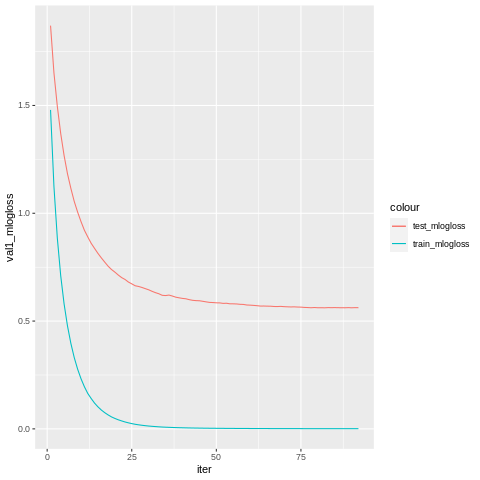

In [ ]:
%%R
eval_log=xgb_comb.fit$evaluation_log
library(ggplot2)
ggplot(eval_log, aes(x=iter)) +
  geom_line(aes(y = val1_mlogloss, color= "train_mlogloss")) +
  geom_line(aes(y = val2_mlogloss, color= "test_mlogloss"))

In [ ]:
%%R
## Finding best nround through Cross-Validation
xgbcv <- xgb.cv(params = params, data = train_comb_matrix, nrounds = 100, nfold = 5, showsd = T, stratified = T, print.every.n = 5, early.stop.round = 10, maximize = F)


[1]	train-mlogloss:1.492469+0.005062	test-mlogloss:1.581766+0.011037 
Multiple eval metrics are present. Will use test_mlogloss for early stopping.
Will train until test_mlogloss hasn't improved in 10 rounds.

[6]	train-mlogloss:0.475136+0.004037	test-mlogloss:0.606555+0.009830 
[11]	train-mlogloss:0.192992+0.000880	test-mlogloss:0.306180+0.010956 
[16]	train-mlogloss:0.086129+0.001341	test-mlogloss:0.174707+0.008489 
[21]	train-mlogloss:0.041335+0.000614	test-mlogloss:0.110846+0.006836 
[26]	train-mlogloss:0.021373+0.000118	test-mlogloss:0.077122+0.006187 
[31]	train-mlogloss:0.012012+0.000169	test-mlogloss:0.057844+0.005824 
[36]	train-mlogloss:0.007462+0.000046	test-mlogloss:0.046742+0.005357 
[41]	train-mlogloss:0.005073+0.000049	test-mlogloss:0.039956+0.004939 
[46]	train-mlogloss:0.003736+0.000044	test-mlogloss:0.035423+0.004947 
[51]	train-mlogloss:0.002908+0.000028	test-mlogloss:0.032321+0.004711 
[56]	train-mlogloss:0.002366+0.000012	test-mlogloss:0.030110+0.004709 
[61]	train

## Tuning the model parameters as this might a case of overfitting due to large difference in train and test loss plot.

In [ ]:
%%R
## Fitting X
xgb_comb_tune.fit=xgb.train(
  params=params,
  data=train_comb_matrix,
  nrounds=200,               ####
  max.depth = 3,             ### new change from default value of 6
  #gamma=1,                   ### new change to avoid overfitting
  early_stopping_rounds = 5, ###  New change from previous 10
  watchlist=list(val1=train_comb_matrix,val2=test_comb_matrix),
  verbose=2                  ### verbose=0, 1 or 2
)

[1]	val1-mlogloss:2.082988	val2-mlogloss:2.212203 
Multiple eval metrics are present. Will use val2_mlogloss for early stopping.
Will train until val2_mlogloss hasn't improved in 5 rounds.

[2]	val1-mlogloss:1.794297	val2-mlogloss:1.964879 
[3]	val1-mlogloss:1.582019	val2-mlogloss:1.799300 
[4]	val1-mlogloss:1.419443	val2-mlogloss:1.675137 
[5]	val1-mlogloss:1.280456	val2-mlogloss:1.568969 
[6]	val1-mlogloss:1.167871	val2-mlogloss:1.491180 
[7]	val1-mlogloss:1.074269	val2-mlogloss:1.419430 
[8]	val1-mlogloss:0.991102	val2-mlogloss:1.352600 
[9]	val1-mlogloss:0.918733	val2-mlogloss:1.301216 
[10]	val1-mlogloss:0.856440	val2-mlogloss:1.251817 
[11]	val1-mlogloss:0.794950	val2-mlogloss:1.206588 
[12]	val1-mlogloss:0.744101	val2-mlogloss:1.164593 
[13]	val1-mlogloss:0.696390	val2-mlogloss:1.125975 
[14]	val1-mlogloss:0.654168	val2-mlogloss:1.097808 
[15]	val1-mlogloss:0.616647	val2-mlogloss:1.068113 
[16]	val1-mlogloss:0.578958	val2-mlogloss:1.042225 
[17]	val1-mlogloss:0.546370	val2-mlogl

In [ ]:
%%R
## Prediction on the test data
library(tidyverse)
xgb_comb_tune_pred <- predict(xgb_comb_tune.fit, newdata = test_comb_matrix)
xgb_comb_tune_prediction <- matrix(xgb_comb_tune_pred, nrow = num_class, ncol = length(xgb_comb_tune_pred)/num_class) %>%
t() %>%
data.frame() %>%
mutate(label = te_comb_label, max_prob = max.col(., "last")-1)

In [ ]:
%%R
xgb_comb_tune_cm=table(Prediction = xgb_comb_tune_prediction$max_prob, Actual = xgb_comb_tune_prediction$label)
xbg_comb_tune_correct_label=sum(diag(xgb_comb_tune_cm))
xgb_comb_tune_accuracy=xbg_comb_tune_correct_label/nrow(test_comb_label)
xgb_comb_tune_accuracy

[1] 0.844116


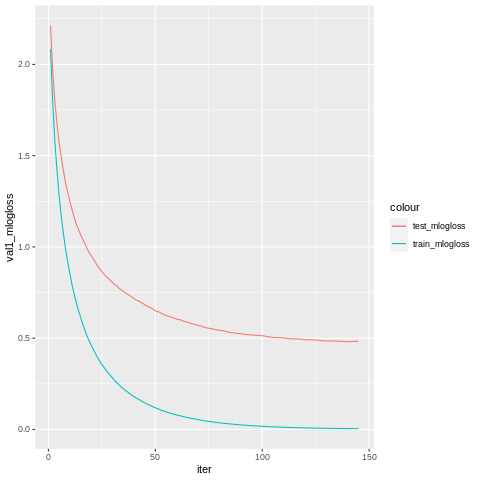

In [ ]:
%%R
eval_log=xgb_comb_tune.fit$evaluation_log
library(ggplot2)
ggplot(eval_log, aes(x=iter)) +
  geom_line(aes(y = val1_mlogloss, color= "train_mlogloss")) +
  geom_line(aes(y = val2_mlogloss, color= "test_mlogloss"))

## Grid search to find the best tuning parameters

In [ ]:
%%R
gbmGrid <-  expand.grid(max_depth = c(3, 5, 7), 
                        nrounds = (1:10)*50,    # number of trees
                        # default values below
                        eta = c(0.1,0.2,0.3),
                        gamma = c(0,1),
                        subsample = 1,
                        min_child_weight = 1,
                        colsample_bytree = 0.6)

In [ ]:
%%R
xgb_trcontrol_1 = trainControl(
  method = "cv",
  number = 5,
  verboseIter = TRUE,
  returnData = FALSE,
  returnResamp = "all",                                                        # save losses across all models
  classProbs = TRUE,                                                           # set to TRUE for AUC to be computed
  #summaryFunction = twoClassSummary,
  allowParallel = TRUE
)

In [ ]:
%%R
# train the model for each parameter combination in the grid,
#   using CV to evaluate
xgb_train_1 = train(
  x = as.matrix(train_comb_label[,-1]),
  y = train_comb_label$label,
  trControl = xgb_trcontrol_1,
  tuneGrid = gbmGrid,
  method = "xgbTree",
  num_class=num_class
)

+ Fold1: eta=0.1, max_depth=3, gamma=0, colsample_bytree=0.6, min_child_weight=1, subsample=1, nrounds=500 
[23:07:35] WARNING: amalgamation/../src/c_api/c_api.cc:718: `ntree_limit` is deprecated, use `iteration_range` instead.
[23:07:35] WARNING: amalgamation/../src/c_api/c_api.cc:718: `ntree_limit` is deprecated, use `iteration_range` instead.
[23:07:35] WARNING: amalgamation/../src/c_api/c_api.cc:718: `ntree_limit` is deprecated, use `iteration_range` instead.
[23:07:35] WARNING: amalgamation/../src/c_api/c_api.cc:718: `ntree_limit` is deprecated, use `iteration_range` instead.
[23:07:35] WARNING: amalgamation/../src/c_api/c_api.cc:718: `ntree_limit` is deprecated, use `iteration_range` instead.
[23:07:35] WARNING: amalgamation/../src/c_api/c_api.cc:718: `ntree_limit` is deprecated, use `iteration_range` instead.
[23:07:36] WARNING: amalgamation/../src/c_api/c_api.cc:718: `ntree_limit` is deprecated, use `iteration_range` instead.
[23:07:36] WARNING: amalgamation/../src/c_api/c_api.

##### Visualizing

In [ ]:
%%R
# create plot object of XGBoost tree
xgb.plot.tree(model=xgb_comb.fit, trees=1,plot_width = 1000, plot_height = 1000)

xgb.plot.multi.trees(feature_names = colnames(train_comb_label[,-1]), 
                     model = xgb_comb.fit)

In [ ]:
%%R
## Feature importance
importance <- xgb.importance(feature_names = colnames(train_comb_label[,-1]) , model = xgb_comb.fit)
head(importance)

In [ ]:
%%R
# Testing whether the results make sense-- important vars
test <- chisq.test(train$Age, output_vector)
print(test)

## Level-2

### URD

In [ ]:
%%R
train_l1=train[train$label %in% c('U', 'R',"D"),]
test_l1=test[test$label %in% c('U', 'R',"D"),]

## Remapping to levels 0,1,2
levels(train_l1$label) <- list( "0" = "D", "1" = "R", "2" = "U")
levels(test_l1$label) <- list( "0" = "D", "1" = "R", "2" = "U")
table(test_l1$label)

In [ ]:
%%R
## Preparing data for XGBoost
train_l1_label <- as.numeric(train_l1$label)-1
train_l1_matrix <- xgb.DMatrix(data = as.matrix(train_l1[,-1]), label = train_l1_label)

test_l1_label <- as.numeric(test_l1$label)-1
test_l1_matrix <- xgb.DMatrix(data = as.matrix(test_l1[,-1]), label = test_l1_label)

In [ ]:
%%R
## Setting parameters for multi-class classification
num_class=3
#num_Classes=3
params = list(
  booster="gbtree",
  objective="multi:softprob",
  eval_metric="mlogloss",
  num_class=num_class
)

In [ ]:
%%R
## Fitting X
xgb_l1.fit=xgb.train(
  params=params,
  data=train_l1_matrix,
  nrounds=200,
  max.depth = 3,
  early_stopping_rounds = 10,
  watchlist=list(val1=train_l1_matrix,val2=test_l1_matrix),
  verbose=2 ## verbose=1 or 2
)

In [ ]:
%%R
## Prediction on the test data
library(tidyverse)
xgb_l1_pred <- predict(xgb_l1.fit, newdata = test_l1_matrix)
xgb_l1_prediction <- matrix(xgb_l1_pred, nrow = num_class, ncol = length(xgb_l1_pred)/num_class) %>%
t() %>%
data.frame() %>%
mutate(label = test_l1_label, max_prob = max.col(., "last")-1)

In [ ]:
%%R
## Confusion Matrix
xgb_l1_cm=table(Prediction = xgb_l1_prediction$max_prob, Actual = xgb_l1_prediction$label)
xgb_l1_cm

In [ ]:
%%R
xbg_l1_correct_label=sum(diag(xgb_l1_cm))
xgb_l1_accuracy=xbg_l1_correct_label/nrow(test_l1)
xgb_l1_accuracy

In [ ]:
%%R
xgb_l1_mis_rate <- vector(mode="list", length=3)
names(xgb_l1_mis_rate) <- levels(train_l1$label)
for(i in 1:3){
  xgb_l1_mis_rate[[i]]=(sum(xgb_l1_cm[,i])-xgb_l1_cm[i,i])/sum(xgb_l1_cm[,i])
}
xgb_l1_mis_rate

In [ ]:
%%R
library(Thermimage)
par(mfcol=c(3,3))
par(mar=c(0, 0, 3, 0), xaxs='i', yaxs='i')

xgb_l1_missed=which(xgb_l1_prediction$max_prob!=xgb_l1_prediction$label)
english_comb=list("D","R","U")
for (i in xgb_l1_missed[1:9]){
    my_mat=matrix((test_l1[i,2:ncol(test_l1)]), nrow=28, ncol=28)
    my_mat_numbers = apply(my_mat, 2, as.numeric)
    image(1:28, 1:28, rotate180.matrix(my_mat_numbers), col=gray((0:255)/255),
          xaxt = 'n', yaxt = 'n',
          main = paste("Actual",unlist(english_comb[xgb_l1_prediction[i,4]+1]),"Predicted",unlist(english_comb[xgb_l1_prediction[i,5]+1]))) 
}

In [ ]:
%%R
eval_log_l1=xgb_l1.fit$evaluation_log
library(ggplot2)
ggplot(eval_log_l1, aes(x=iter)) +
  geom_line(aes(y = val1_mlogloss, color= "train_mlogloss")) +
  geom_line(aes(y = val2_mlogloss, color= "test_mlogloss"))

### AEMNS

### GHT